## Homework #5. Exploratory Data Analysis
#### Author: `YURII KUZMENKO`
#### Total time spent on h/w (in minutes): '600 m'`

Гіпотези:

- більше повідомлень пишуть під час навчального року
- більше голосових повідомлень записують в п'ятницю
- чим більше юзерів - тим більше повідомлень
- чим більше юзерів - тим більме матів * 
- кількість моїх повідомлень збільшилась після вступу в Могилянку

Дослідження: 
- популярні емодзі * 
- використання слів * 
- використання слів паразитів  * 
- згадування гри дота2 в повідомленнях 
- групи з спільними юзерами  * 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from PIL import Image

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import warnings
warnings.filterwarnings('ignore')

In [2]:
DIALOGS_MERGED_DATA_PATH = "./merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "./merged_data/dialogs_users_all.csv"

MY_ID = 277741288

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/yurii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yurii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
with open('./curse_words_ru.txt', 'r')as f:
    curse_words_ru = set(map(lambda x: x.lower(), f.read().split('\n\n') ))
with open('./ukr_curse_words.txt', 'r')as f:
    curse_words_ua = set(map(lambda x: x.lower(), f.read().split('\n') ))
with open('./ukr_stopwords.txt', 'r')as f:
    stopwords_ua = f.read().splitlines()

In [5]:
curse_words = curse_words_ua.union(curse_words_ru)

In [6]:
ru_stopwords = stopwords.words('russian')
en_stopwords = stopwords.words('english')

stopwords_full = set(stopwords_ua + ru_stopwords + en_stopwords + ['https', 'это', 'бля'])

In [7]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [8]:
df['from_id'] = df['from_id'].apply(lambda x: np.int64(x.strip().split('=')[-1].replace(")", "")) if type(x) != float else x)
df['to_id'] = df['to_id'].apply(lambda x: np.int64(x.strip().split('=')[-1].replace(")", "")) if type(x) != float else x)

In [9]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [10]:
df

id        date      from_id      to_id fwd_from  \
0        430831  2021-12-27  277741288.0  341365060      NaN   
1        430830  2021-12-27  277741288.0  341365060      NaN   
2        430829  2021-12-27  277741288.0  341365060      NaN   
3        430828  2021-12-27  277741288.0  341365060      NaN   
4        430827  2021-12-27  277741288.0  341365060      NaN   
...         ...         ...          ...        ...      ...   
1188876  235450  2020-09-24          NaN  277741288      NaN   
1188877  235447  2020-09-24  277741288.0  334976382      NaN   
1188878  431076  2021-12-29          NaN  277741288      NaN   
1188879  431075  2021-12-29          NaN  277741288      NaN   
1188880  219838  2020-05-31          NaN  277741288      NaN   

                                                   message     type  duration  \
0                                                        😭  sticker       NaN   
1                                                       33     text       NaN   
2                                                 соус ещё     text       NaN   
3                                                        а     text       NaN   
4                                                        🤯  sticker       NaN   
...                                                    ...      ...       ...   
1188876  Привет. Куда именно? Если для физ-ры, то тогда...     text       NaN   
1188877  Привет, подскажи пожалуйста\nКакие документы/с...     text       NaN   
1188878                                                NaN     text       NaN   
1188879                                                  ;     text       NaN   
1188880                                                NaN     text       NaN   

         dialog_id  
0        341365060  
1        341365060  
2        341365060  
3        341365060  
4        341365060  
...            ...  
1188876  334976382  
1188877  334976382  
1188878  556977849  
1188879  556977849  
1188880  981946667  

[1188881 rows x 9 columns]

In [11]:
df_meta

dialog_id                name            type  \
0         360124737                Егор  Private dialog   
1        -372123438                  Др           Group   
2        -372123438                  Др           Group   
3        -372123438                  Др           Group   
4        -372123438                  Др           Group   
...             ...                 ...             ...   
7137 -1001787503050     CSS_01_2022_KMA           Group   
7138 -1001787503050     CSS_01_2022_KMA           Group   
7139     1049429585  Вакансии на Джинне  Private dialog   
7140      439556468    Veronika Rudenko  Private dialog   
7141      418938213      Vita Olshevska  Private dialog   

                                                  users  
0     {'user_id': 360124737, 'first_name': 'Егор', '...  
1     {'user_id': 584619902, 'first_name': 'Крис🌸💕',...  
2     {'user_id': 444854522, 'first_name': 'Сер', 'l...  
3     {'user_id': 495835679, 'first_name': 'Аліна', ...  
4     {'user_id': 384579817, 'first_name': 'Ragazi',...  
...                                                 ...  
7137  {'user_id': 1480256565, 'first_name': 'уля', '...  
7138  {'user_id': 559072245, 'first_name': 'Катя', '...  
7139  {'user_id': 1049429585, 'first_name': 'Ваканси...  
7140  {'user_id': 439556468, 'first_name': 'Veronika...  
7141  {'user_id': 418938213, 'first_name': 'Vita', '...  

[7142 rows x 4 columns]

In [12]:
df_meta['dialog_id'] = df_meta['dialog_id'].astype('str')
df['dialog_id'] = df['dialog_id'].astype('str')

In [13]:
df[~df['dialog_id'].isna()]

id        date      from_id      to_id fwd_from  \
0        430831  2021-12-27  277741288.0  341365060      NaN   
1        430830  2021-12-27  277741288.0  341365060      NaN   
2        430829  2021-12-27  277741288.0  341365060      NaN   
3        430828  2021-12-27  277741288.0  341365060      NaN   
4        430827  2021-12-27  277741288.0  341365060      NaN   
...         ...         ...          ...        ...      ...   
1188876  235450  2020-09-24          NaN  277741288      NaN   
1188877  235447  2020-09-24  277741288.0  334976382      NaN   
1188878  431076  2021-12-29          NaN  277741288      NaN   
1188879  431075  2021-12-29          NaN  277741288      NaN   
1188880  219838  2020-05-31          NaN  277741288      NaN   

                                                   message     type  duration  \
0                                                        😭  sticker       NaN   
1                                                       33     text       NaN   
2                                                 соус ещё     text       NaN   
3                                                        а     text       NaN   
4                                                        🤯  sticker       NaN   
...                                                    ...      ...       ...   
1188876  Привет. Куда именно? Если для физ-ры, то тогда...     text       NaN   
1188877  Привет, подскажи пожалуйста\nКакие документы/с...     text       NaN   
1188878                                                NaN     text       NaN   
1188879                                                  ;     text       NaN   
1188880                                                NaN     text       NaN   

         dialog_id  
0        341365060  
1        341365060  
2        341365060  
3        341365060  
4        341365060  
...            ...  
1188876  334976382  
1188877  334976382  
1188878  556977849  
1188879  556977849  
1188880  981946667  

[1188881 rows x 9 columns]

In [14]:
df_meta['users'] = df_meta['users'].apply(lambda x: eval(x))

In [15]:
df_meta['user_id'] = df_meta['users'].apply(lambda x: x['user_id'])

In [16]:
df_meta_groups = df_meta[df_meta['type'] == 'Group']
df_meta_groups

dialog_id             name   type  \
1         -372123438               Др  Group   
2         -372123438               Др  Group   
3         -372123438               Др  Group   
4         -372123438               Др  Group   
5         -372123438               Др  Group   
...              ...              ...    ...   
7134  -1001787503050  CSS_01_2022_KMA  Group   
7135  -1001787503050  CSS_01_2022_KMA  Group   
7136  -1001787503050  CSS_01_2022_KMA  Group   
7137  -1001787503050  CSS_01_2022_KMA  Group   
7138  -1001787503050  CSS_01_2022_KMA  Group   

                                                  users     user_id  
1     {'user_id': 584619902, 'first_name': 'Крис🌸💕',...   584619902  
2     {'user_id': 444854522, 'first_name': 'Сер', 'l...   444854522  
3     {'user_id': 495835679, 'first_name': 'Аліна', ...   495835679  
4     {'user_id': 384579817, 'first_name': 'Ragazi',...   384579817  
5     {'user_id': 277741288, 'first_name': 'yyuuuurr...   277741288  
...                                                 ...         ...  
7134  {'user_id': 419413633, 'first_name': 'Никита',...   419413633  
7135  {'user_id': 380133204, 'first_name': 'Pavlo Ya...   380133204  
7136  {'user_id': 504389777, 'first_name': 'Aня', 'l...   504389777  
7137  {'user_id': 1480256565, 'first_name': 'уля', '...  1480256565  
7138  {'user_id': 559072245, 'first_name': 'Катя', '...   559072245  

[6823 rows x 5 columns]

In [17]:
ids = df_meta_groups.groupby(['dialog_id', 'name'])['user_id'].apply(set).reset_index()
df_meta_groups = df_meta_groups.groupby('dialog_id')['users'].apply(list).reset_index().merge(ids, how='inner', on='dialog_id')

In [18]:
df_meta_groups

dialog_id                                              users  \
0    -1001111800350  [{'user_id': 556977849, 'first_name': 'Oleksii...   
1    -1001124109395  [{'user_id': 455550602, 'first_name': 'Андрей'...   
2    -1001142723513  [{'user_id': 455550602, 'first_name': 'Андрей'...   
3    -1001143841755  [{'user_id': 241629528, 'first_name': 'Program...   
4    -1001151208414  [{'user_id': 341365060, 'first_name': 'Альфонс...   
..              ...                                                ...   
107      -787146292  [{'user_id': 540893531, 'first_name': 'Zoriana...   
108      -789116561  [{'user_id': 277741288, 'first_name': 'yyuuuur...   
109      -795058430  [{'user_id': 855734991, 'first_name': 'Богдан'...   
110      -799336269  [{'user_id': 716096216, 'first_name': 'arkahah...   
111      -799511159  [{'user_id': 384852109, 'first_name': 'Деня', ...   

                                                  name  \
0                                        GULAG-INSPIRE   
1                                           Філіал КМЦ   
2                                                   ФІ   
3    FIdo — Make FI A Greater One /* FIdo über alle...   
4                                            Пивозавры   
..                                                 ...   
107                       Диференціальні рівняння ПМ-2   
108                                             ром2.0   
109                                        NG(niggers)   
110                      Управління цифровим продуктом   
111                                       Др Анастасии   

                                               user_id  
0    {5064336384, 361427466, 409483275, 381300750, ...  
1    {346742787, 97665032, 282730509, 1623285773, 2...  
2    {632571906, 1083607046, 384845835, 542935052, ...  
3    {400862080, 269045381, 278171783, 455550602, 3...  
4    {315599105, 414015683, 341365060, 277741288, 4...  
..                                                 ...  
107  {419413633, 470773767, 455550602, 544701196, 4...  
108      {277741288, 342667961, 544639169, 1419351245}  
109       {277741288, 371105962, 471619805, 855734991}  
110  {415579776, 419413633, 408733826, 671563272, 3...  
111                  {277741288, 419909704, 384852109}  

[112 rows x 4 columns]

### ANALYZE EMOJIS USAGE *

In [19]:
import advertools as adv

#### EMOJIS IN Groups

In [20]:
df_groups = df[df['dialog_id'].isin(df_meta_groups['dialog_id'])]
df_full_groups = df_groups.merge(df_meta_groups[['dialog_id', 'name']], on='dialog_id', how='inner')

group_emojis = adv.extract_emoji(df_full_groups[~df_full_groups['message'].isna()]['message'])
emojis_df_groups = pd.DataFrame(group_emojis['top_emoji'], columns=['emoji', 'counts'])
emojis_df_groups = emojis_df_groups.iloc[:5, :]


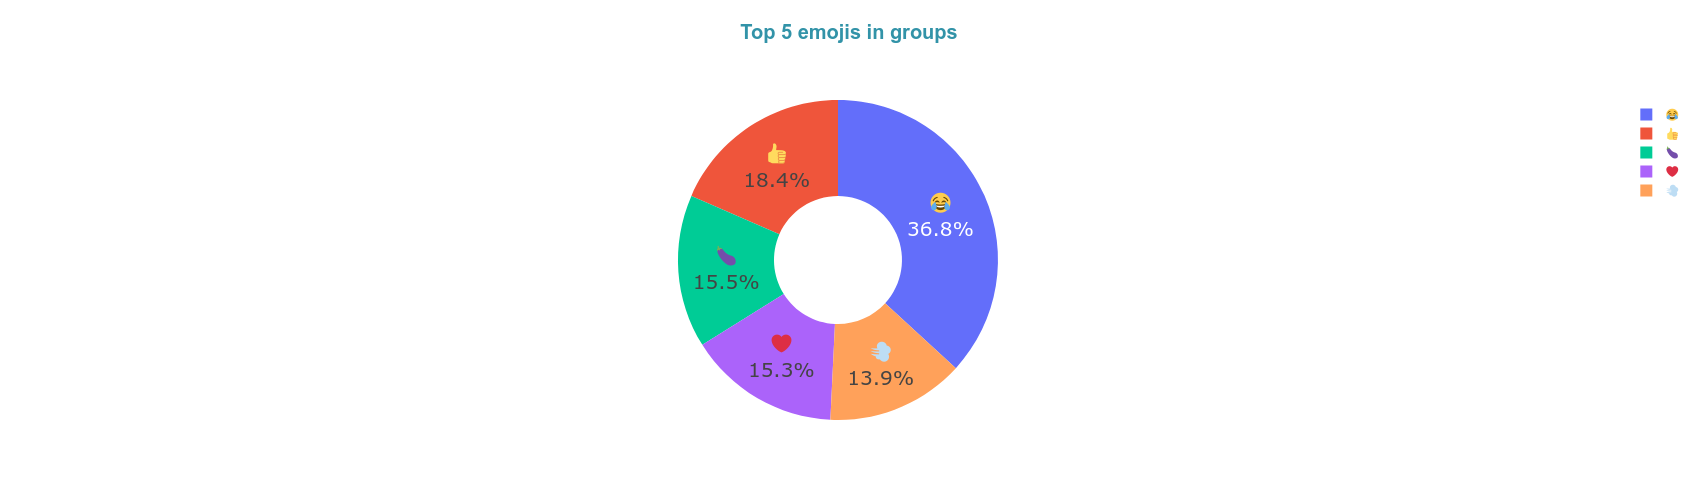

In [21]:
fig = go.Figure(data=[go.Pie(labels=emojis_df_groups['emoji'], values=emojis_df_groups['counts'],hole=.4, name='emoji', )])
fig.update_layout(xaxis={'categoryorder':'total ascending'},width=1000,
    height=500, title=dict(
        text='<b>Top 5 emojis in groups</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ))
fig.update_traces(hoverinfo="label+value+percent+name", textfont_size=20,textposition='inside', textinfo='percent+label')

fig.show()

####  Emojis in private dialogs

In [22]:
df_private = df[~df['dialog_id'].isin(df_meta_groups['dialog_id'])]
df_full_private = df_private.merge(df_meta[['dialog_id', 'name']], on='dialog_id', how='inner')
df_full_private = df_full_private[~(df_full_private['name'] == 'KMAScheduler')]
private_emojis = adv.extract_emoji(df_full_private[~df_full_private['message'].isna()]['message'])
emojis_df_private = pd.DataFrame(private_emojis['top_emoji'], columns=['emoji', 'counts'])
emojis_df_private = emojis_df_private.iloc[:5, :]


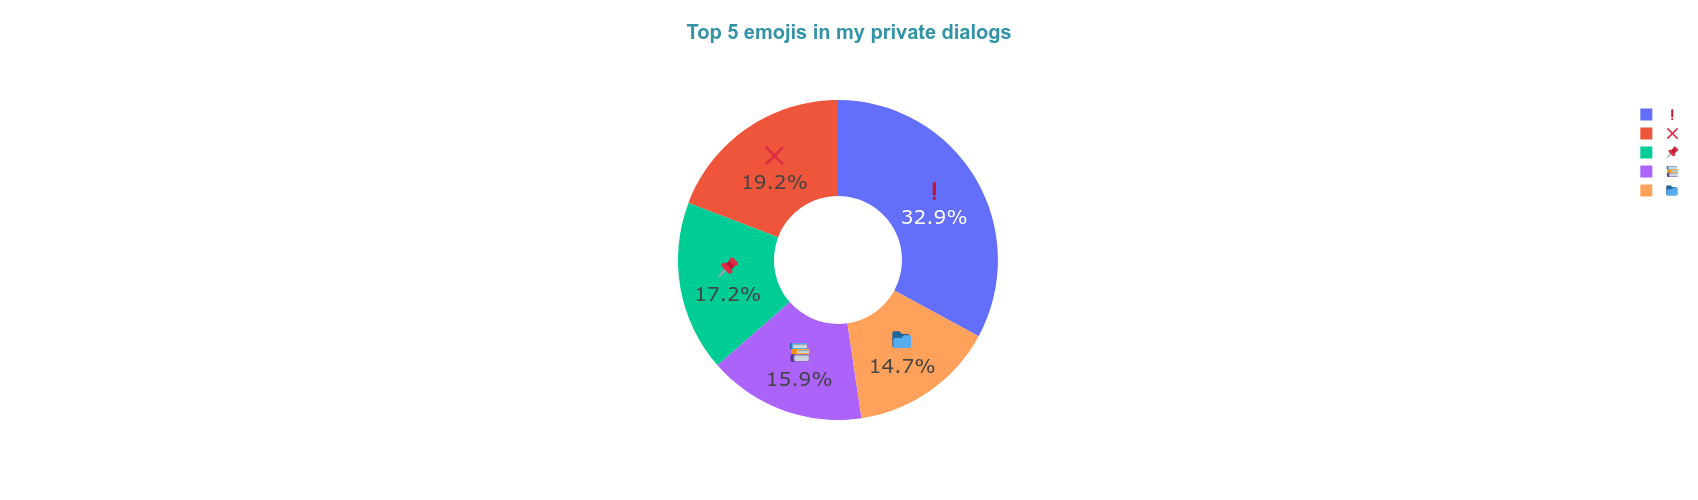

In [23]:
fig = go.Figure(data=[go.Pie(labels=emojis_df_private['emoji'], values=emojis_df_private['counts'],hole=.4, name='Emoji', )])
fig.update_layout(xaxis={'categoryorder':'total ascending'},width=1000,
    height=500, title=dict(
        text='<b>Top 5 emojis in my private dialogs</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ))
fig.update_traces(hoverinfo="label+value+percent+name", textfont_size=20,textposition='inside', textinfo='percent+label')

fig.show()

In [24]:
df_full_private['week_day'] = pd.to_datetime(df_full_private['date']).dt.day_name()
df_full_groups['week_day'] = pd.to_datetime(df_full_groups['date']).dt.day_name()

### Get top groups to analyze them

In [25]:
def remove_me(u_set):
    temp = list(u_set)
    if MY_ID in temp:
        temp.remove(MY_ID)
    return set(temp)

In [26]:
df_meta_groups['user_id'] = df_meta_groups['user_id'].apply(lambda x: remove_me(x))

In [27]:
df_meta_groups

dialog_id                                              users  \
0    -1001111800350  [{'user_id': 556977849, 'first_name': 'Oleksii...   
1    -1001124109395  [{'user_id': 455550602, 'first_name': 'Андрей'...   
2    -1001142723513  [{'user_id': 455550602, 'first_name': 'Андрей'...   
3    -1001143841755  [{'user_id': 241629528, 'first_name': 'Program...   
4    -1001151208414  [{'user_id': 341365060, 'first_name': 'Альфонс...   
..              ...                                                ...   
107      -787146292  [{'user_id': 540893531, 'first_name': 'Zoriana...   
108      -789116561  [{'user_id': 277741288, 'first_name': 'yyuuuur...   
109      -795058430  [{'user_id': 855734991, 'first_name': 'Богдан'...   
110      -799336269  [{'user_id': 716096216, 'first_name': 'arkahah...   
111      -799511159  [{'user_id': 384852109, 'first_name': 'Деня', ...   

                                                  name  \
0                                        GULAG-INSPIRE   
1                                           Філіал КМЦ   
2                                                   ФІ   
3    FIdo — Make FI A Greater One /* FIdo über alle...   
4                                            Пивозавры   
..                                                 ...   
107                       Диференціальні рівняння ПМ-2   
108                                             ром2.0   
109                                        NG(niggers)   
110                      Управління цифровим продуктом   
111                                       Др Анастасии   

                                               user_id  
0    {5064336384, 361427466, 409483275, 381300750, ...  
1    {346742787, 97665032, 1623285773, 282730509, 2...  
2    {632571906, 1083607046, 384845835, 542935052, ...  
3    {400862080, 269045381, 278171783, 455550602, 3...  
4    {315599105, 414015683, 341365060, 449395499, 9...  
..                                                 ...  
107  {419413633, 470773767, 455550602, 544701196, 4...  
108                 {342667961, 544639169, 1419351245}  
109                  {371105962, 471619805, 855734991}  
110  {415579776, 419413633, 408733826, 671563272, 3...  
111                             {419909704, 384852109}  

[112 rows x 4 columns]

In [28]:
top_groups = df_meta_groups[df_meta_groups['user_id'].apply(lambda x: len(x)) >=100]
top_groups['n_users'] = top_groups['user_id'].apply(lambda x: len(x))



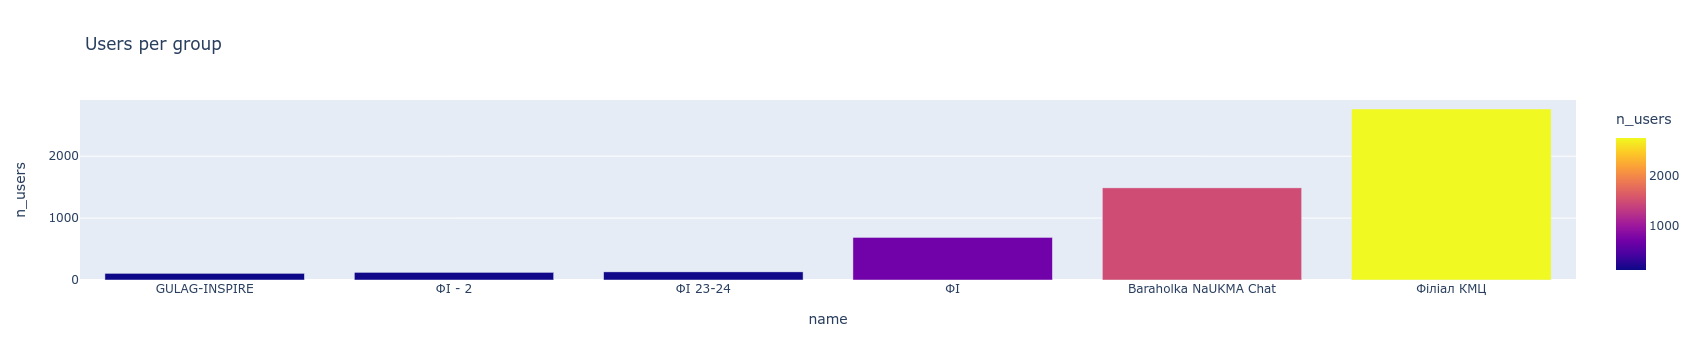

In [29]:
fig = px.bar(top_groups, x='name', y='n_users',color='n_users', title='Users per group')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

#### Top groups by amount of messages

In [30]:
df_meta_groups['n_users'] = df_meta_groups['user_id'].apply(lambda x: len(x))


In [31]:
df_full_groups_mes = df_full_groups.groupby(['name', 'dialog_id'], as_index=False)['message'].count().sort_values(by='message', ascending=False)
df_full_groups_mes = df_full_groups_mes.nlargest(10, 'message').sample(frac=1).reset_index(drop=True)
df_full_groups_mes

name       dialog_id  message
0                                        Примати20х2  -1001260680685    96025
1                                          хейт клуб  -1001175611567    91994
2                                         Філіал КМЦ  -1001124109395    94635
3                                                 SP      -406777668    15491
4                                             ФІ - 2  -1001481887487    53078
5                                       блото уйобіщ  -1001356176648    62710
6                                     53А-англійська      -319447904    19892
7  FIdo — Make FI A Greater One /* FIdo über alle...  -1001143841755    30729
8                                                 ФІ  -1001142723513    97528
9                              Baraholka NaUKMA Chat  -1001218251741    36250

In [32]:
df_full_groups_mes = df_full_groups_mes.merge(df_meta_groups[['dialog_id', 'n_users']], on='dialog_id', how='inner')

In [33]:
df_full_groups_mes

name       dialog_id  message  \
0                                        Примати20х2  -1001260680685    96025   
1                                          хейт клуб  -1001175611567    91994   
2                                         Філіал КМЦ  -1001124109395    94635   
3                                                 SP      -406777668    15491   
4                                             ФІ - 2  -1001481887487    53078   
5                                       блото уйобіщ  -1001356176648    62710   
6                                     53А-англійська      -319447904    19892   
7  FIdo — Make FI A Greater One /* FIdo über alle...  -1001143841755    30729   
8                                                 ФІ  -1001142723513    97528   
9                              Baraholka NaUKMA Chat  -1001218251741    36250   

   n_users  
0       44  
1       13  
2     2762  
3        4  
4      124  
5       42  
6       15  
7       63  
8      688  
9     1488

In [34]:
df_full_groups_mes.iloc[0, 0] = 'Fido'
df_full_groups_mes

name       dialog_id  message  \
0                                               Fido  -1001260680685    96025   
1                                          хейт клуб  -1001175611567    91994   
2                                         Філіал КМЦ  -1001124109395    94635   
3                                                 SP      -406777668    15491   
4                                             ФІ - 2  -1001481887487    53078   
5                                       блото уйобіщ  -1001356176648    62710   
6                                     53А-англійська      -319447904    19892   
7  FIdo — Make FI A Greater One /* FIdo über alle...  -1001143841755    30729   
8                                                 ФІ  -1001142723513    97528   
9                              Baraholka NaUKMA Chat  -1001218251741    36250   

   n_users  
0       44  
1       13  
2     2762  
3        4  
4      124  
5       42  
6       15  
7       63  
8      688  
9     1488

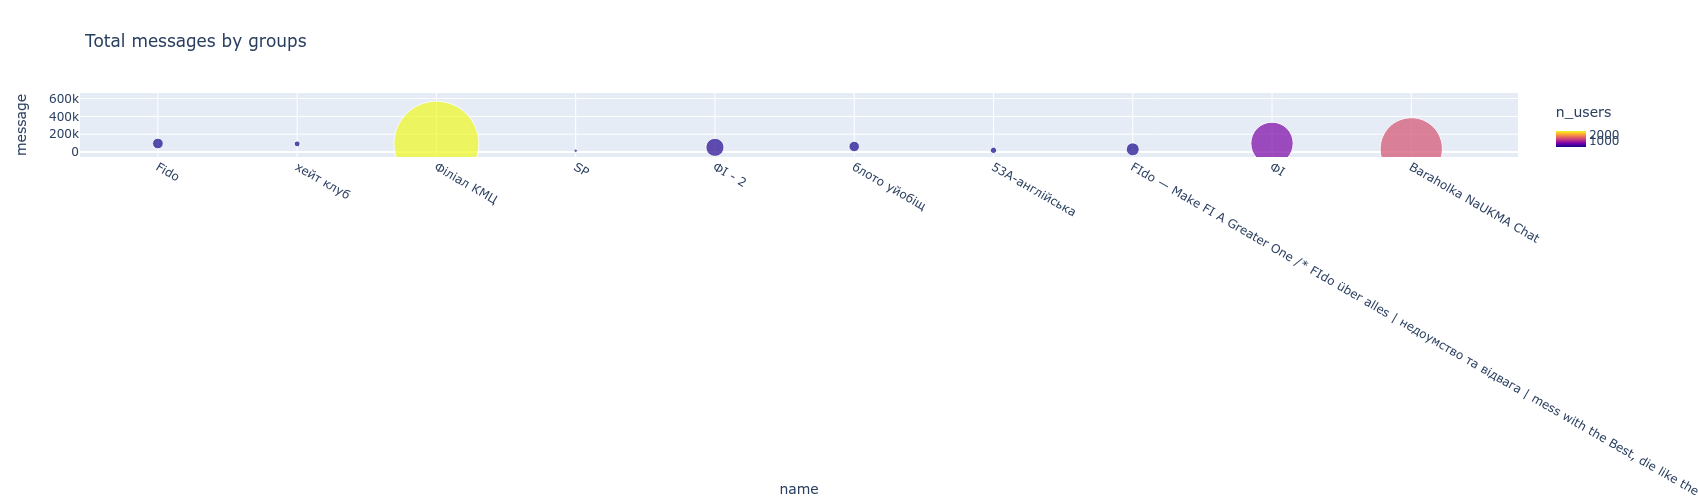

In [35]:
fig = px.scatter(df_full_groups_mes, x="name", y="message",
	         size="n_users", color="n_users",
                 hover_name="n_users", size_max=60, title='Total messages by groups')
fig.update_layout(height=500, width=1200)
fig.show()

## SWEAR WORDS *

#### Swear words in groups

In [36]:
df_full_groups_clear = df_full_groups[~df_full_groups['message'].isna()]
df_full_groups_clear['tokenized'] = df_full_groups_clear['message'].apply(lambda x : set([token.lower() for token in word_tokenize(x) if token not in string.punctuation]))
df_full_groups_clear['cursed'] = df_full_groups_clear['tokenized'].apply(lambda x : len(x.intersection(curse_words)))
cursed_groups = df_full_groups_clear.groupby('name', as_index=False)['cursed'].sum()
cursed_groups = cursed_groups[cursed_groups['cursed'] > 900]


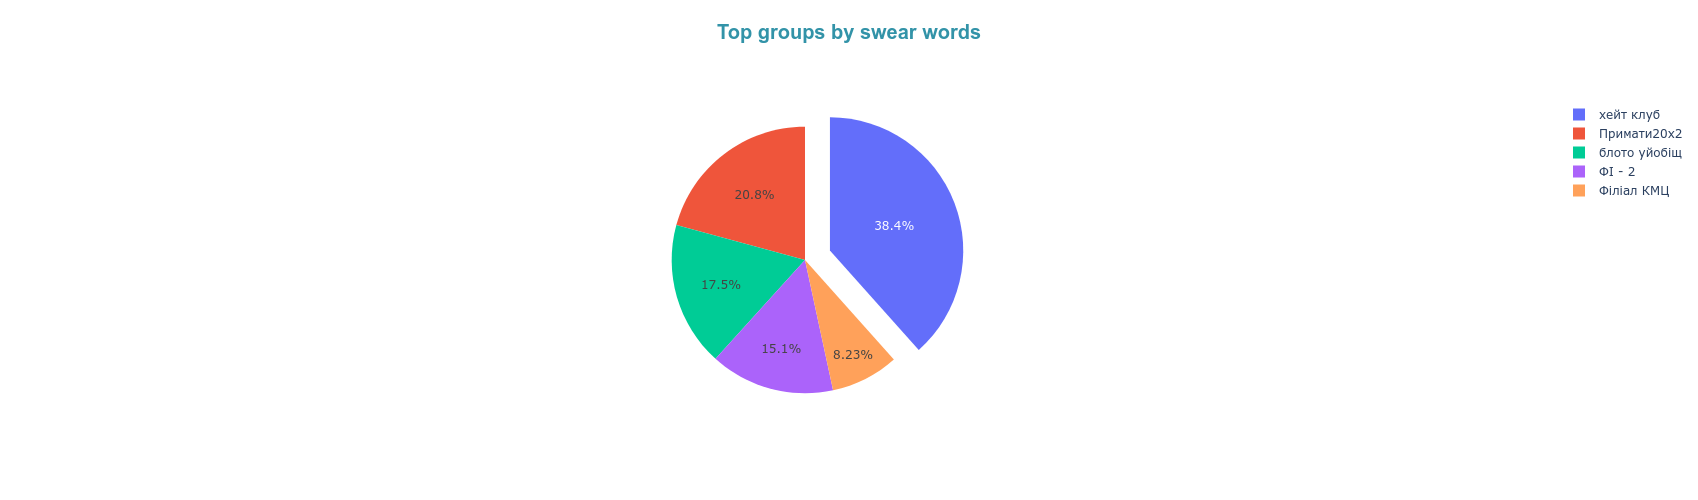

In [37]:
fig = go.Figure(data=[go.Pie(labels=cursed_groups['name'], values=cursed_groups['cursed'], pull=[0, 0, 0,0 , 0.2],)])
fig.update_layout(width=1000,
    height=500,title=dict(
        text='<b>Top groups by swear words</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),)
fig.show()

#### Swear words in private dialogs

In [38]:
df_full_private_clear = df_full_private[~df_full_private['message'].isna()]
df_full_private_clear['tokenized'] = df_full_private_clear['message'].apply(lambda x : set([token.lower() for token in word_tokenize(x) if token not in string.punctuation]))
df_full_private_clear['cursed'] = df_full_private_clear['tokenized'].apply(lambda x : len(x.intersection(curse_words)))
cursed_private = df_full_private_clear.groupby('name', as_index=False)['cursed'].sum()
cursed_private = cursed_private.sort_values(by='cursed', ascending=False).reset_index(drop=True).iloc[:5]


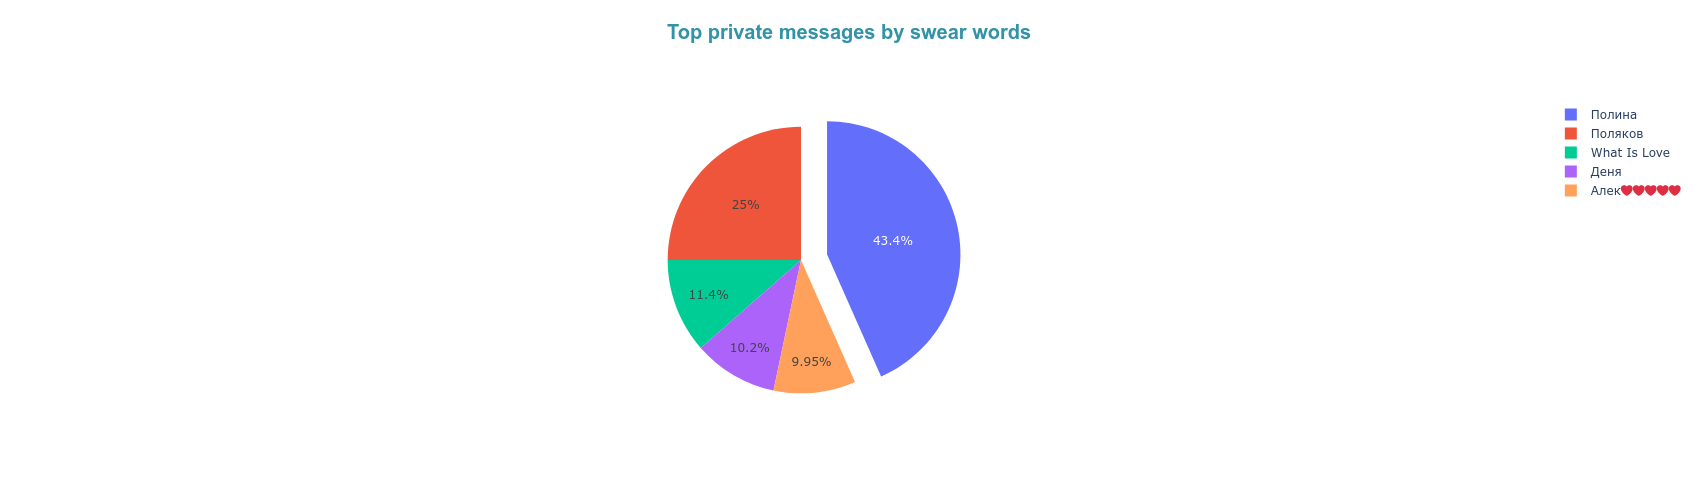

In [39]:
fig = go.Figure(data=[go.Pie(labels=cursed_private['name'], values=cursed_private['cursed'], pull=[0.2, 0, 0,0 , 0])])
fig.update_layout(width=1000,
    height=500,title=dict(
        text='<b>Top private messages by swear words</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),)
fig.show()

## MOST USED WORDS *

In [40]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

#### In groups

In [41]:
group_text = ' '.join(df_full_groups_clear['tokenized'].apply(lambda x: " ".join(x)))

In [42]:
group_tokens = word_tokenize(remove_emojis(group_text))

In [43]:
group_tokens = [word for word in group_tokens if word.isalpha()]

In [44]:
group_tokens = [w for w in group_tokens if not w in stopwords_full]

In [45]:
group_text = " ".join(group_tokens)

In [46]:
telegram_mask = np.array(Image.open("./img/Telegram_logo.png"))


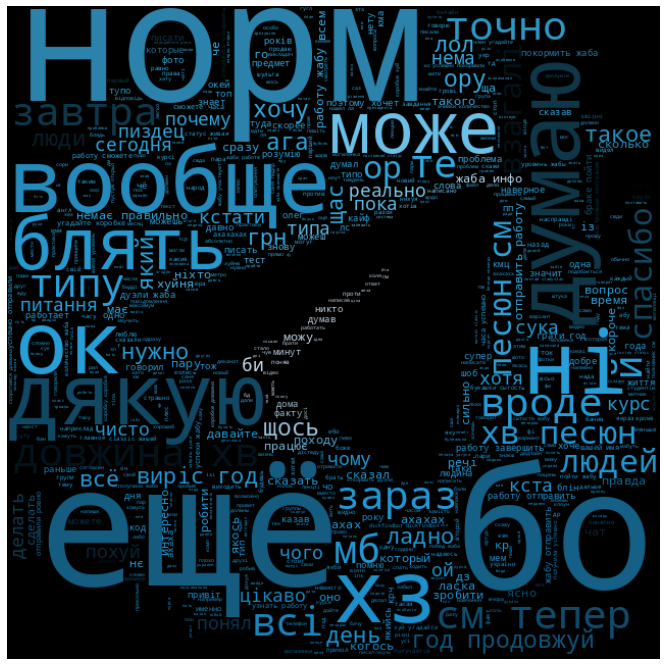

In [47]:
wordcloud_groups = WordCloud(background_color="black", mode="RGBA", max_words=1000, mask=telegram_mask).generate(group_text)
image_colors = ImageColorGenerator(telegram_mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_groups.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

#### Private Messages

In [48]:
private_text = ' '.join(df_full_private_clear['tokenized'].apply(lambda x: " ".join(x)))

In [49]:
private_tokens = word_tokenize(remove_emojis(private_text))

In [50]:
private_tokens = [word for word in private_tokens if word.isalpha()]

In [51]:
private_tokens = [w for w in private_tokens if not w in stopwords_full]

In [52]:
private_text = " ".join(private_tokens)

In [53]:
telegram_mask = np.array(Image.open("./img/Telegram_logo.png"))


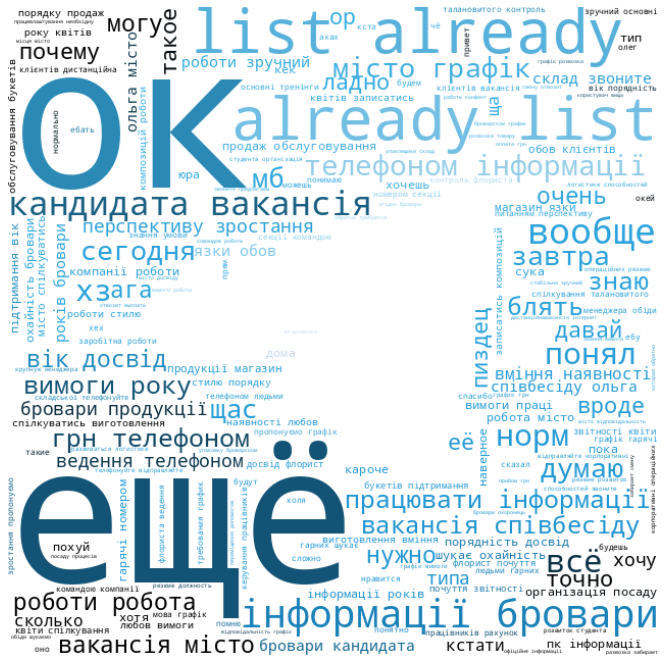

In [54]:
wordcloud_private = WordCloud(background_color="white", mode="RGBA",mask=telegram_mask).generate(private_text)
image_colors = ImageColorGenerator(telegram_mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_private.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## DOTA mention in private messages

In [55]:
df_dota = df_full_private_clear.copy()
df_dota['tokenized'] = df_dota['message'].apply(lambda x: word_tokenize(x))

df_dota

id        date      from_id      to_id fwd_from  \
0       430831  2021-12-27  277741288.0  341365060      NaN   
1       430830  2021-12-27  277741288.0  341365060      NaN   
2       430829  2021-12-27  277741288.0  341365060      NaN   
3       430828  2021-12-27  277741288.0  341365060      NaN   
4       430827  2021-12-27  277741288.0  341365060      NaN   
...        ...         ...          ...        ...      ...   
229903  235452  2020-09-24  277741288.0  334976382      NaN   
229904  235451  2020-09-24          NaN  277741288      NaN   
229905  235450  2020-09-24          NaN  277741288      NaN   
229906  235447  2020-09-24  277741288.0  334976382      NaN   
229908  431075  2021-12-29          NaN  277741288      NaN   

                                                  message     type  duration  \
0                                                       😭  sticker       NaN   
1                                                      33     text       NaN   
2                                                соус ещё     text       NaN   
3                                                       а     text       NaN   
4                                                       🤯  sticker       NaN   
...                                                   ...      ...       ...   
229903                                      Так, эта есть     text       NaN   
229904  Если для военки, то это можно узнать у Ярика Ш...     text       NaN   
229905  Привет. Куда именно? Если для физ-ры, то тогда...     text       NaN   
229906  Привет, подскажи пожалуйста\nКакие документы/с...     text       NaN   
229908                                                  ;     text       NaN   

        dialog_id            name   week_day  \
0       341365060         Альфонс     Monday   
1       341365060         Альфонс     Monday   
2       341365060         Альфонс     Monday   
3       341365060         Альфонс     Monday   
4       341365060         Альфонс     Monday   
...           ...             ...        ...   
229903  334976382  Dmytro Novykov   Thursday   
229904  334976382  Dmytro Novykov   Thursday   
229905  334976382  Dmytro Novykov   Thursday   
229906  334976382  Dmytro Novykov   Thursday   
229908  556977849  Oleksii Kulish  Wednesday   

                                                tokenized  cursed  
0                                                     [😭]       0  
1                                                    [33]       0  
2                                             [соус, ещё]       0  
3                                                     [а]       0  
4                                                     [🤯]       0  
...                                                   ...     ...  
229903                                [Так, ,, эта, есть]       0  
229904  [Если, для, военки, ,, то, это, можно, узнать,...       0  
229905  [Привет, ., Куда, именно, ?, Если, для, физ-ры...       0  
229906  [Привет, ,, подскажи, пожалуйста, Какие, докум...       0  
229908                                                [;]       0  

[206871 rows x 13 columns]

In [56]:
df_dota['tokenized'] = df_dota['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()])

In [57]:
df_dota['dota'] = df_dota['tokenized'].apply(lambda x: x.count('дота') + x.count('дока') + x.count('дота2') + 
                                             x.count("дока2") + x.count('dota')+x.count('dota2') + x.count('doka') + x.count('doka2')+ x.count('доту')+ x.count('доку'))
df_dota

id        date      from_id      to_id fwd_from  \
0       430831  2021-12-27  277741288.0  341365060      NaN   
1       430830  2021-12-27  277741288.0  341365060      NaN   
2       430829  2021-12-27  277741288.0  341365060      NaN   
3       430828  2021-12-27  277741288.0  341365060      NaN   
4       430827  2021-12-27  277741288.0  341365060      NaN   
...        ...         ...          ...        ...      ...   
229903  235452  2020-09-24  277741288.0  334976382      NaN   
229904  235451  2020-09-24          NaN  277741288      NaN   
229905  235450  2020-09-24          NaN  277741288      NaN   
229906  235447  2020-09-24  277741288.0  334976382      NaN   
229908  431075  2021-12-29          NaN  277741288      NaN   

                                                  message     type  duration  \
0                                                       😭  sticker       NaN   
1                                                      33     text       NaN   
2                                                соус ещё     text       NaN   
3                                                       а     text       NaN   
4                                                       🤯  sticker       NaN   
...                                                   ...      ...       ...   
229903                                      Так, эта есть     text       NaN   
229904  Если для военки, то это можно узнать у Ярика Ш...     text       NaN   
229905  Привет. Куда именно? Если для физ-ры, то тогда...     text       NaN   
229906  Привет, подскажи пожалуйста\nКакие документы/с...     text       NaN   
229908                                                  ;     text       NaN   

        dialog_id            name   week_day  \
0       341365060         Альфонс     Monday   
1       341365060         Альфонс     Monday   
2       341365060         Альфонс     Monday   
3       341365060         Альфонс     Monday   
4       341365060         Альфонс     Monday   
...           ...             ...        ...   
229903  334976382  Dmytro Novykov   Thursday   
229904  334976382  Dmytro Novykov   Thursday   
229905  334976382  Dmytro Novykov   Thursday   
229906  334976382  Dmytro Novykov   Thursday   
229908  556977849  Oleksii Kulish  Wednesday   

                                                tokenized  cursed  dota  
0                                                      []       0     0  
1                                                      []       0     0  
2                                             [соус, ещё]       0     0  
3                                                     [а]       0     0  
4                                                      []       0     0  
...                                                   ...     ...   ...  
229903                                   [так, эта, есть]       0     0  
229904  [если, для, военки, то, это, можно, узнать, у,...       0     0  
229905  [привет, куда, именно, если, для, то, тогда, н...       0     0  
229906  [привет, подскажи, пожалуйста, какие, нужно, п...       0     0  
229908                                                 []       0     0  

[206871 rows x 14 columns]

In [58]:
dota_private = df_dota.groupby('name', as_index=False)['dota'].sum().query('dota > 0')


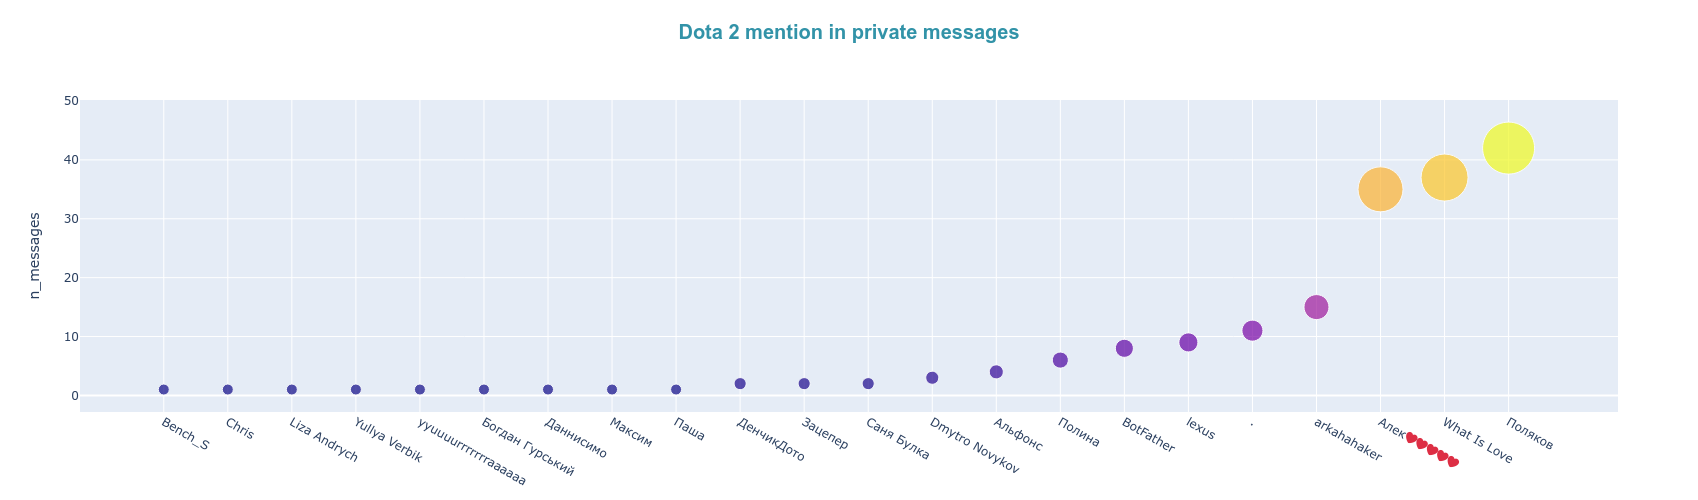

In [59]:
fig = go.Figure(data=[go.Scatter(
    x=dota_private['name'],
    y=dota_private['dota'],
    mode='markers',
    marker=dict(
        color=dota_private['dota'] + 115,
        size=dota_private['dota'] + 10,
        showscale=False
        )
)])

fig.update_layout(xaxis={'categoryorder':'total ascending', }, yaxis={'title': 'n_messages'},title=dict(
        text='<b>Dota 2 mention in private messages</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000,
    height=500)
fig.show()

## Dota mention in group messages

In [60]:
df_dota = df_full_groups_clear.copy()
df_dota['tokenized'] = df_dota['message'].apply(lambda x: word_tokenize(x))

df_dota

id        date       from_id      to_id fwd_from  \
0       365701  2021-06-15  2.290293e+08  464694704      NaN   
1       365699  2021-06-15  2.688757e+08  464694704      NaN   
2       365698  2021-06-15  2.688757e+08  464694704      NaN   
3       365697  2021-06-15  2.290293e+08  464694704      NaN   
5       365676  2021-06-14  2.688757e+08  464694704      NaN   
...        ...         ...           ...        ...      ...   
788068  418029  2021-11-25  5.447012e+08  602054203      NaN   
788069  418028  2021-11-25  5.446392e+08  602054203      NaN   
788071  418026  2021-11-25  1.419351e+09  602054203      NaN   
788072  418025  2021-11-25  1.419351e+09  602054203      NaN   
788078  418019  2021-11-25  1.419351e+09  602054203      NaN   

                                          message  type  duration   dialog_id  \
0                                              Ні  text       NaN  -464694704   
1            Ти 18 будеш до мене їхати з кухнею?)  text       NaN  -464694704   
2                                             Моя  text       NaN  -464694704   
3                                        @MetukaS  text       NaN  -464694704   
5                                              Ок  text       NaN  -464694704   
...                                           ...   ...       ...         ...   
788068                                      єбать  text       NaN  -602054203   
788069                   у меня есть виш лист Юли  text       NaN  -602054203   
788071       Если честно я в хуй не дую чё дарить  text       NaN  -602054203   
788072  Для начала надо выдумать чё-то с подарком  text       NaN  -602054203   
788078                              Добавьте Надю  text       NaN  -602054203   

                          name  week_day  \
0               З'їзд Братства   Tuesday   
1               З'їзд Братства   Tuesday   
2               З'їзд Братства   Tuesday   
3               З'їзд Братства   Tuesday   
5               З'їзд Братства    Monday   
...                        ...       ...   
788068  Шишки по себестоймости  Thursday   
788069  Шишки по себестоймости  Thursday   
788071  Шишки по себестоймости  Thursday   
788072  Шишки по себестоймости  Thursday   
788078  Шишки по себестоймости  Thursday   

                                                tokenized  cursed  
0                                                    [Ні]       0  
1       [Ти, 18, будеш, до, мене, їхати, з, кухнею, ?, )]       0  
2                                                   [Моя]       0  
3                                            [@, MetukaS]       0  
5                                                    [Ок]       0  
...                                                   ...     ...  
788068                                            [єбать]       0  
788069                    [у, меня, есть, виш, лист, Юли]       0  
788071     [Если, честно, я, в, хуй, не, дую, чё, дарить]       1  
788072  [Для, начала, надо, выдумать, чё-то, с, подарком]       0  
788078                                   [Добавьте, Надю]       0  

[726275 rows x 13 columns]

In [61]:
df_dota['tokenized'] = df_dota['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()])

In [62]:
df_dota['dota'] = df_dota['tokenized'].apply(lambda x: x.count('дота') + x.count('дока') + x.count('дота2') + 
                                             x.count("дока2") + x.count('dota')+x.count('dota2') + x.count('doka') + x.count('doka2')+ x.count('доту')+ x.count('доку'))
df_dota

id        date       from_id      to_id fwd_from  \
0       365701  2021-06-15  2.290293e+08  464694704      NaN   
1       365699  2021-06-15  2.688757e+08  464694704      NaN   
2       365698  2021-06-15  2.688757e+08  464694704      NaN   
3       365697  2021-06-15  2.290293e+08  464694704      NaN   
5       365676  2021-06-14  2.688757e+08  464694704      NaN   
...        ...         ...           ...        ...      ...   
788068  418029  2021-11-25  5.447012e+08  602054203      NaN   
788069  418028  2021-11-25  5.446392e+08  602054203      NaN   
788071  418026  2021-11-25  1.419351e+09  602054203      NaN   
788072  418025  2021-11-25  1.419351e+09  602054203      NaN   
788078  418019  2021-11-25  1.419351e+09  602054203      NaN   

                                          message  type  duration   dialog_id  \
0                                              Ні  text       NaN  -464694704   
1            Ти 18 будеш до мене їхати з кухнею?)  text       NaN  -464694704   
2                                             Моя  text       NaN  -464694704   
3                                        @MetukaS  text       NaN  -464694704   
5                                              Ок  text       NaN  -464694704   
...                                           ...   ...       ...         ...   
788068                                      єбать  text       NaN  -602054203   
788069                   у меня есть виш лист Юли  text       NaN  -602054203   
788071       Если честно я в хуй не дую чё дарить  text       NaN  -602054203   
788072  Для начала надо выдумать чё-то с подарком  text       NaN  -602054203   
788078                              Добавьте Надю  text       NaN  -602054203   

                          name  week_day  \
0               З'їзд Братства   Tuesday   
1               З'їзд Братства   Tuesday   
2               З'їзд Братства   Tuesday   
3               З'їзд Братства   Tuesday   
5               З'їзд Братства    Monday   
...                        ...       ...   
788068  Шишки по себестоймости  Thursday   
788069  Шишки по себестоймости  Thursday   
788071  Шишки по себестоймости  Thursday   
788072  Шишки по себестоймости  Thursday   
788078  Шишки по себестоймости  Thursday   

                                             tokenized  cursed  dota  
0                                                 [ні]       0     0  
1              [ти, будеш, до, мене, їхати, з, кухнею]       0     0  
2                                                [моя]       0     0  
3                                            [metukas]       0     0  
5                                                 [ок]       0     0  
...                                                ...     ...   ...  
788068                                         [єбать]       0     0  
788069                 [у, меня, есть, виш, лист, юли]       0     0  
788071  [если, честно, я, в, хуй, не, дую, чё, дарить]       1     0  
788072      [для, начала, надо, выдумать, с, подарком]       0     0  
788078                                [добавьте, надю]       0     0  

[726275 rows x 14 columns]

In [63]:
dota_groups = df_dota.groupby('name', as_index=False)['dota'].sum().query('dota > 0')


In [64]:
dota_groups = dota_groups.query('dota >= 10')
dota_groups

name  dota
65    Примати20х2    33
68       Работяги    10
78             ФІ    23
81     Філіал КМЦ    12
91   блото уйобіщ   316
103     хейт клуб   112

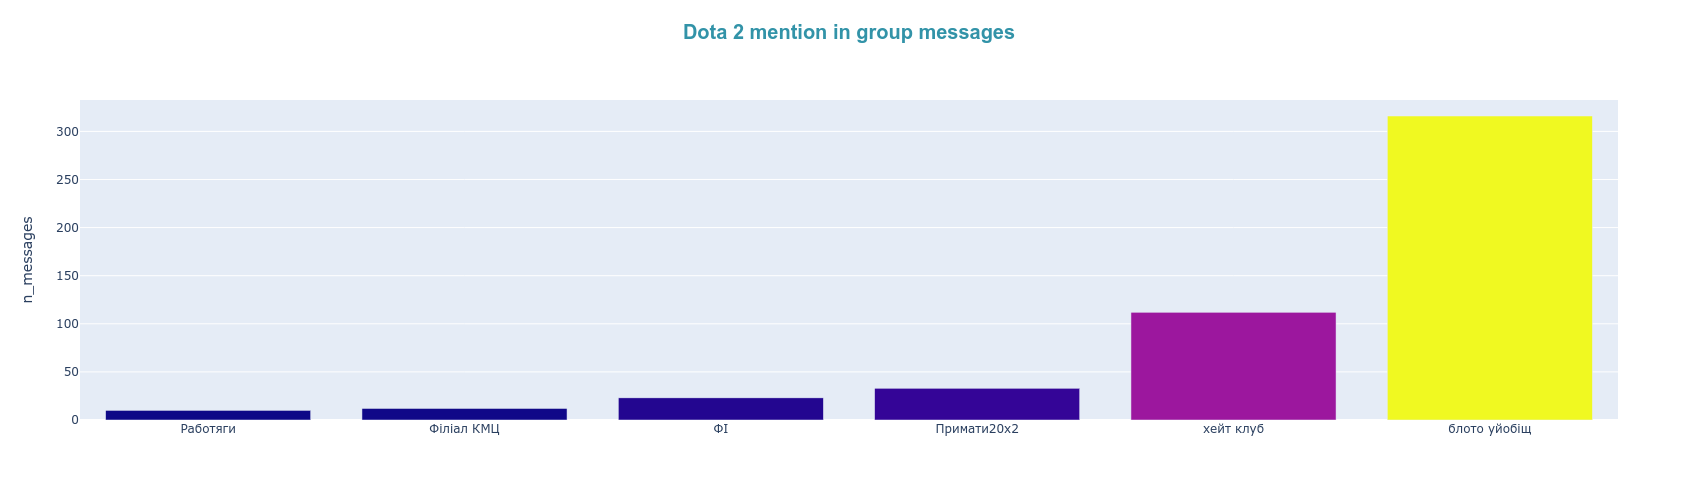

In [65]:
fig = go.Figure(data=[go.Bar(
    x=dota_groups['name'],
    y=dota_groups['dota'],
    marker=dict(
        color=dota_groups['dota'] + 115,
        showscale=False
        )
)])

fig.update_layout(xaxis={'categoryorder':'total ascending'}, yaxis={'title': 'n_messages'}, title=dict(
        text='<b>Dota 2 mention in group messages</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000, 
    height=500)
fig.show()

## Parasite words * 

In [66]:
parasite_words = ['типу', 'коротше', 'тіпа', "короче", "кароч", "крч", "типа"]

In [67]:
df_parasites = df[~df['message'].isna()].copy()
df_parasites['tokenized'] = df_parasites['message'].apply(lambda x: word_tokenize(x))

In [68]:
df_parasites['tokenized'] = df_parasites['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()])
parasites_text = " ".join(group_tokens)

In [69]:
from collections import Counter

c = Counter(parasites_text.split())
parasites_dict = {x:c[x] for x in parasite_words}

In [70]:
parasites_dict

{'типу': 2643,
 'коротше': 94,
 'тіпа': 344,
 'короче': 962,
 'кароч': 78,
 'крч': 676,
 'типа': 1451}

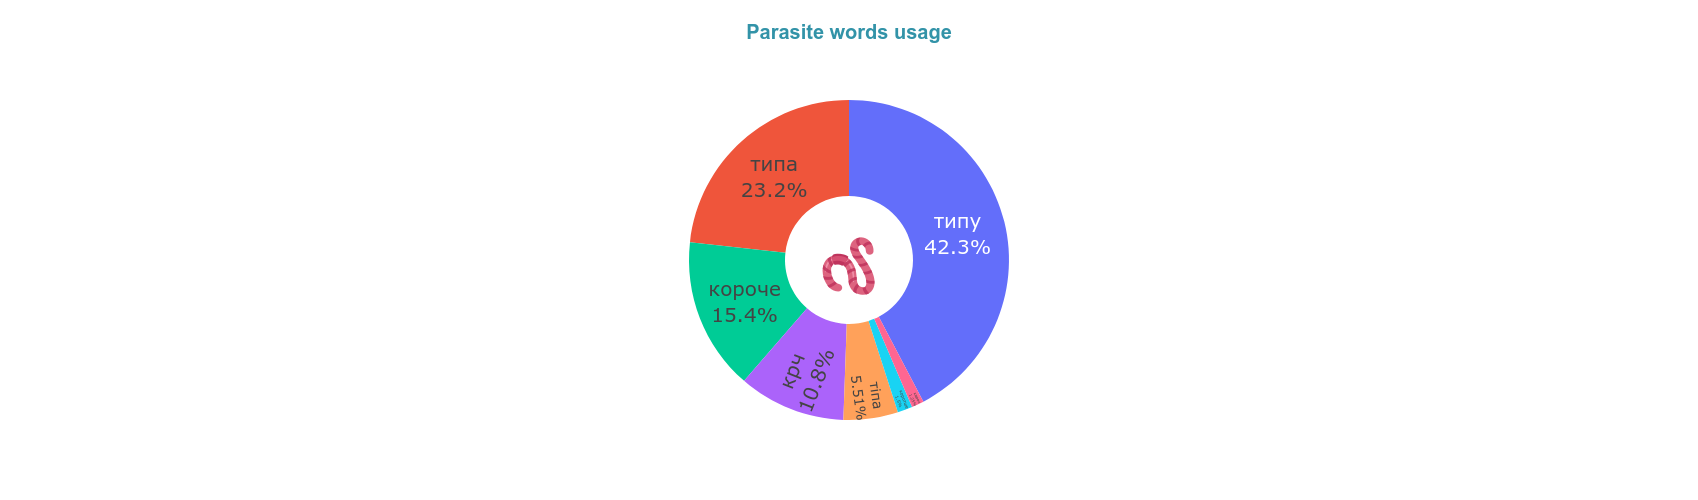

In [71]:
df_parasites = pd.DataFrame(list(parasites_dict.items()), columns=['word', 'count'])
fig = go.Figure(data=[go.Pie(labels=df_parasites['word'], values=df_parasites['count'],hole=.4, name='Words',title='🪱')])
fig.update_layout(xaxis={'categoryorder':'total ascending'},width=1000,
    height=500, title=dict(
        text='<b>Parasite words usage</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),showlegend=False)
fig.update_traces(hoverinfo="label+value+percent+name", textfont_size=20,textposition='inside', textinfo='percent+label', title_font=dict(size=60,family='Verdana', 
                                   color='darkred'),)
fig.show()

## VOICE MESSAGES ANALYZE * 

#### Groups analyze

In [72]:
df_full_groups_voice = df_full_groups[df_full_groups['type'] == 'voice']
voice_duration_groups = df_full_groups_voice.groupby('name', as_index=False)['duration'].sum()

In [73]:
voice_duration_groups = voice_duration_groups.sort_values(by='duration',ascending=False).reset_index(drop=True).iloc[:10]
voice_duration_groups.iloc[7,0] = 'Шульга др'
voice_duration_groups

name  duration
0              хейт клуб   55360.0
1                     SP    5298.0
2                   Бичи    3517.0
3               биомусор    3071.0
4             Філіал КМЦ    2929.0
5                     ФІ    2477.0
6  Baraholka NaUKMA Chat    1767.0
7              Шульга др    1580.0
8           блото уйобіщ    1504.0
9   Подарок для обригана    1367.0

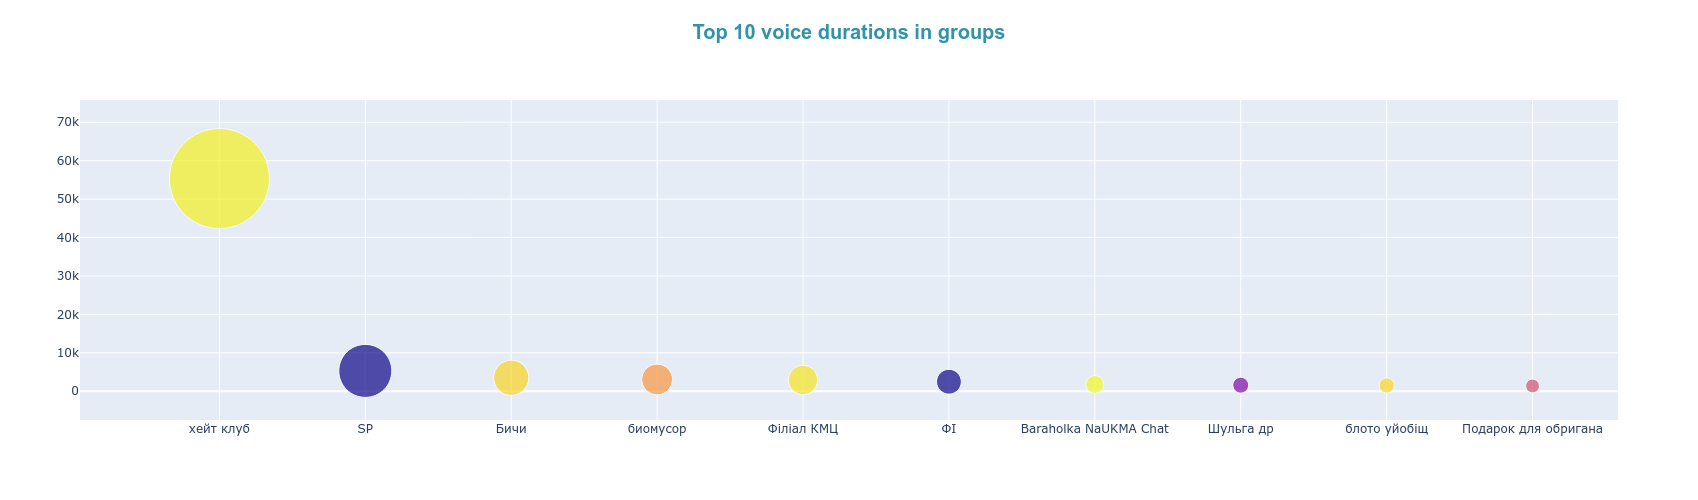

In [74]:
fig = go.Figure(data=[go.Scatter(
    x=voice_duration_groups['name'],
    y=voice_duration_groups['duration'],
    mode='markers',
    marker=dict(
        color=(voice_duration_groups['duration'] / 100) + np.random.randint(100, 1000, 10),
        size=[100, ] + list(voice_duration_groups['duration'].iloc[1:] / 100),
        showscale=False
        )
)])

fig.update_layout(title=dict(
        text='<b>Top 10 voice durations in groups</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000,
    height=500)
fig.show()

In [75]:
df_voice_mean = df_full_groups_voice.groupby('name', as_index=False).agg({'type': 'count', 'duration': 'mean'})
df_voice_mean = df_voice_mean[df_voice_mean['type'] >= 20]
df_voice_mean = df_voice_mean.sort_values(by='duration',ascending=False).reset_index(drop=True).iloc[:10]
df_voice_mean

name  type   duration
0  FIdo — Make FI A Greater One /* FIdo über alle...    20  40.200000
1                                                 ФІ    70  35.385714
2                                         Філіал КМЦ    85  34.458824
3                                          хейт клуб  2258  24.517272
4                                      федя(не баня)    44  21.931818
5  Шульга др)))))))))))))))))))))))))))))))))))))...    80  19.750000
6                                      Дом крутых ☝️    37  18.567568
7                                          Ах Одесса    28  18.214286
8                            не ожидали, а мы пришли    63  16.984127
9                Сука вы шо про саню забули пидараси    73  16.643836

In [76]:
df_voice_mean['name'][df_voice_mean['name'].str.contains('Шульга')]= "Шульга др"
df_voice_mean['name'][df_voice_mean['name'].str.contains('FIdo')] = "FIdo"
df_voice_mean

name  type   duration
0                                 FIdo    20  40.200000
1                                   ФІ    70  35.385714
2                           Філіал КМЦ    85  34.458824
3                            хейт клуб  2258  24.517272
4                        федя(не баня)    44  21.931818
5                            Шульга др    80  19.750000
6                        Дом крутых ☝️    37  18.567568
7                            Ах Одесса    28  18.214286
8              не ожидали, а мы пришли    63  16.984127
9  Сука вы шо про саню забули пидараси    73  16.643836

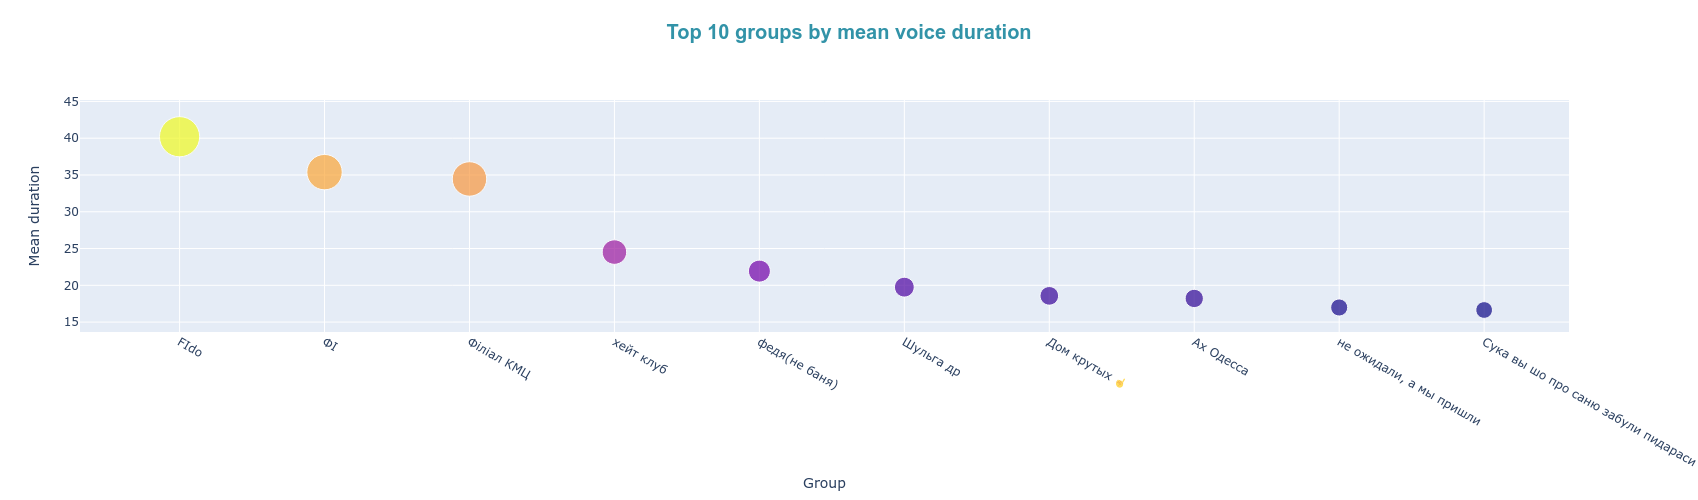

In [77]:
fig = go.Figure(data=[go.Scatter(
    x=df_voice_mean['name'],
    y=df_voice_mean['duration'],
    mode='markers',
    marker=dict(
        color=df_voice_mean['duration'],
        size=df_voice_mean['duration'],
        showscale=False
        )
)])

fig.update_layout(title=dict(
        text='<b>Top 10 groups by mean voice duration</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000,
    height=500,
                  xaxis=dict(
        title="Group"
    ),
    yaxis=dict(
        title="Mean duration"
    ))
fig.show()

In [78]:
voice_weekday_duration = df_full_groups_voice.groupby('week_day', as_index=False)['duration'].sum()
voice_weekday_duration

week_day  duration
0     Friday   15934.0
1     Monday   12661.0
2   Saturday   11574.0
3     Sunday   12492.0
4   Thursday   15016.0
5    Tuesday   13471.0
6  Wednesday   16817.0

In [79]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
voice_weekday_duration['week_day'] = pd.Categorical(voice_weekday_duration['week_day'], categories=days, ordered=True)
voice_weekday_duration = voice_weekday_duration.sort_values('week_day')
voice_weekday_duration

week_day  duration
1     Monday   12661.0
5    Tuesday   13471.0
6  Wednesday   16817.0
4   Thursday   15016.0
0     Friday   15934.0
2   Saturday   11574.0
3     Sunday   12492.0

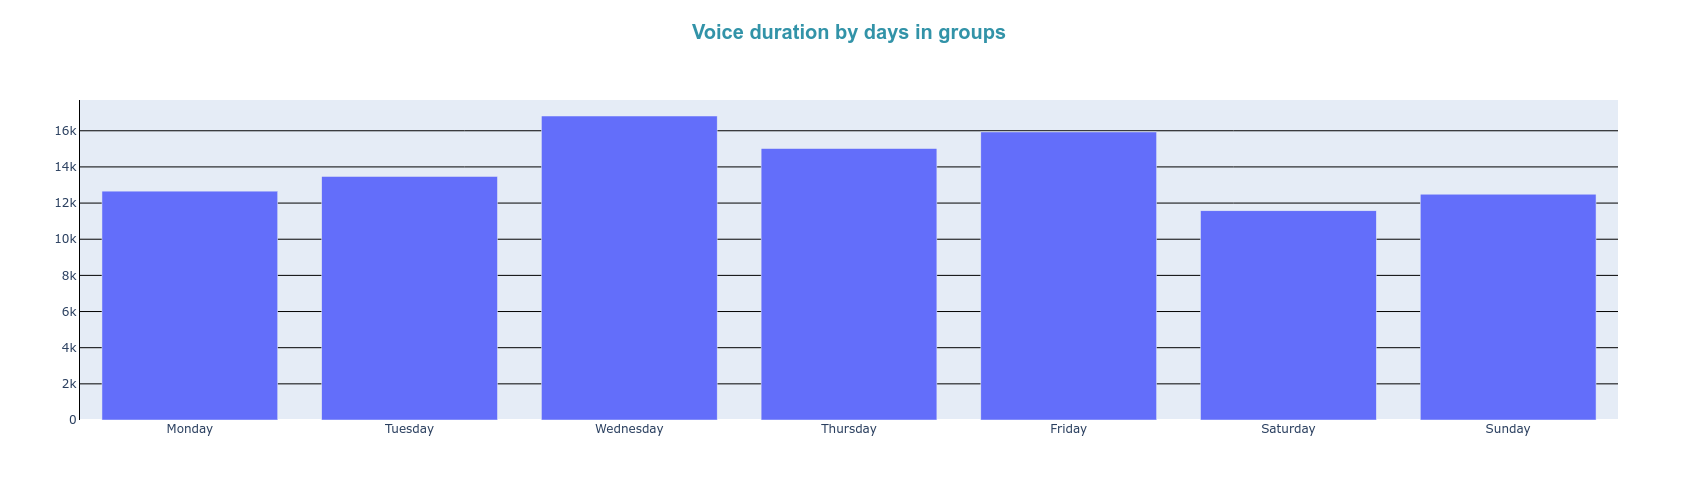

In [80]:
fig = go.Figure(data=[go.Bar(
    x=voice_weekday_duration['week_day'],
    y=voice_weekday_duration['duration'],
)])

fig.update_layout( title=dict(
        text='<b>Voice duration by days in groups</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000, 
    height=500)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='Black')
fig.show()

#### Private voices

In [81]:
df_full_private_voice = df_full_private[df_full_private['type'] == 'voice']
voice_duration_private = df_full_private_voice.groupby('name', as_index=False)['duration'].sum()

In [82]:
voice_duration_private = voice_duration_private.sort_values(by='duration',ascending=False).reset_index(drop=True).iloc[:10]
voice_duration_private

name  duration
0         Поляков   23993.0
1  Алек❤️❤️❤️❤️❤️    5083.0
2             Юля    4168.0
3      Саня Булка    3834.0
4            Деня    3350.0
5           Дымок    2676.0
6          Полина    2571.0
7         Альфонс    2177.0
8    What Is Love    1635.0
9               .    1500.0

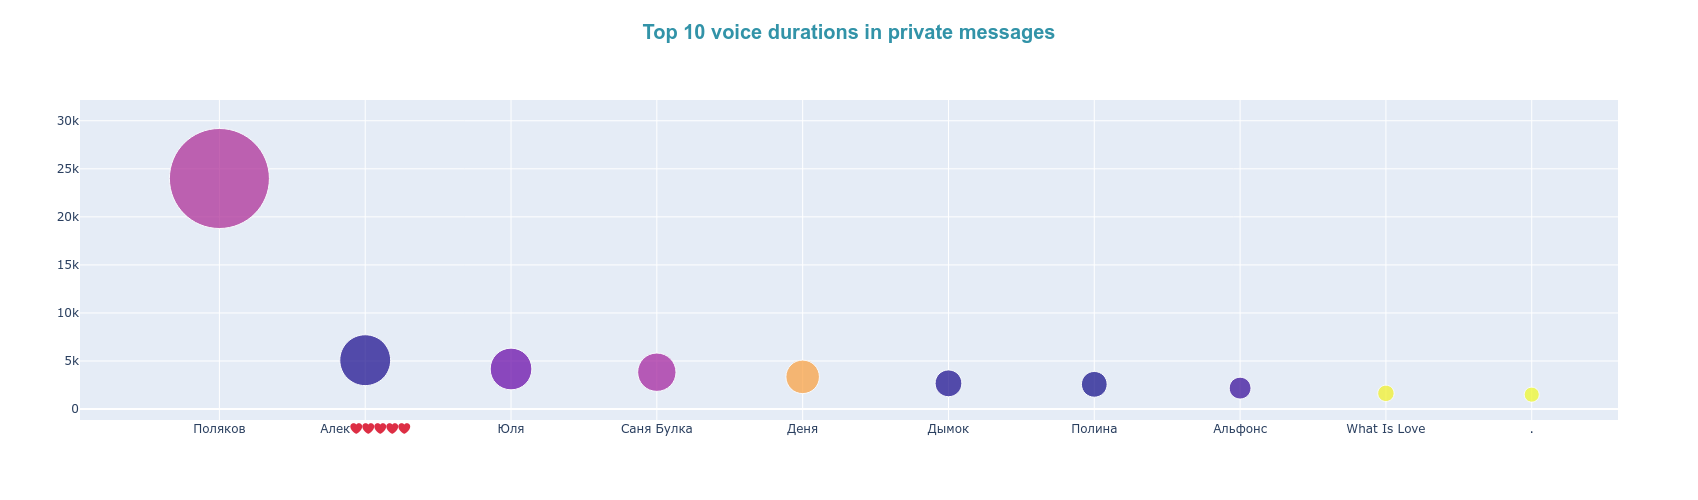

In [83]:
fig = go.Figure(data=[go.Scatter(
    x=voice_duration_private['name'],
    y=voice_duration_private['duration'],
    mode='markers',
    marker=dict(
        color=(voice_duration_private['duration'] / 100) + np.random.randint(100, 1000, 10),
        size=[100, ] + list(voice_duration_private['duration'].iloc[1:] / 100),
        showscale=False
        )
)])

fig.update_layout(title=dict(
        text='<b>Top 10 voice durations in private messages</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000,
    height=500)
fig.show()

In [84]:
voice_weekday_duration_private = df_full_private_voice.groupby('week_day', as_index=False)['duration'].sum()
voice_weekday_duration_private

week_day  duration
0     Friday   10230.0
1     Monday   10144.0
2   Saturday    6439.0
3     Sunday    9188.0
4   Thursday    9231.0
5    Tuesday    8444.0
6  Wednesday    8191.0

In [85]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
voice_weekday_duration_private['week_day'] = pd.Categorical(voice_weekday_duration_private['week_day'], categories=days, ordered=True)
voice_weekday_duration_private = voice_weekday_duration_private.sort_values('week_day')
voice_weekday_duration_private

week_day  duration
1     Monday   10144.0
5    Tuesday    8444.0
6  Wednesday    8191.0
4   Thursday    9231.0
0     Friday   10230.0
2   Saturday    6439.0
3     Sunday    9188.0

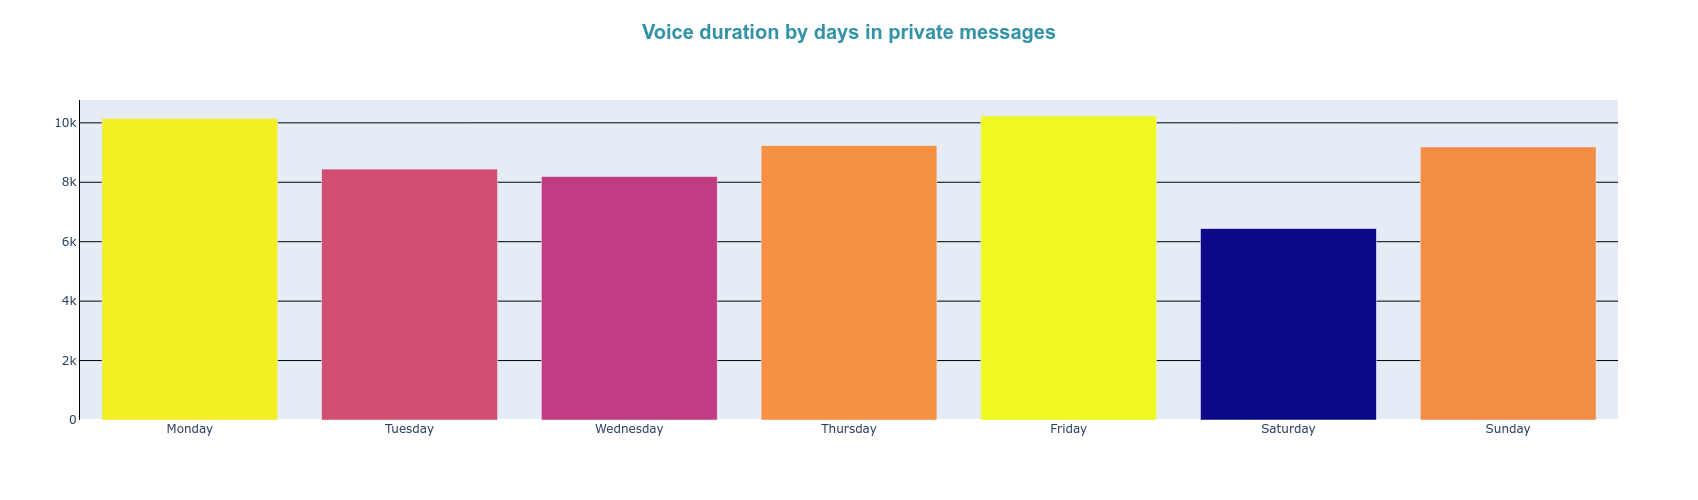

In [86]:
fig = go.Figure(data=[go.Bar(
    x=voice_weekday_duration_private['week_day'],
    y=voice_weekday_duration_private['duration'],
    marker=dict(
        color=voice_weekday_duration_private['duration'],
        showscale=False
        )
)])

fig.update_layout( title=dict(
        text='<b>Voice duration by days in private messages</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),width=1000, 
    height=500)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='Black')
fig.show()

## Common users * 

In [87]:
def common_users(df, user_list):

    df = df[df['user_id'] != user_list]
    test = df['user_id'].apply(lambda x: 1 if len(x.intersection(user_list)) > 0 else 0)
    return test.sum()



In [88]:
df_meta_groups

dialog_id                                              users  \
0    -1001111800350  [{'user_id': 556977849, 'first_name': 'Oleksii...   
1    -1001124109395  [{'user_id': 455550602, 'first_name': 'Андрей'...   
2    -1001142723513  [{'user_id': 455550602, 'first_name': 'Андрей'...   
3    -1001143841755  [{'user_id': 241629528, 'first_name': 'Program...   
4    -1001151208414  [{'user_id': 341365060, 'first_name': 'Альфонс...   
..              ...                                                ...   
107      -787146292  [{'user_id': 540893531, 'first_name': 'Zoriana...   
108      -789116561  [{'user_id': 277741288, 'first_name': 'yyuuuur...   
109      -795058430  [{'user_id': 855734991, 'first_name': 'Богдан'...   
110      -799336269  [{'user_id': 716096216, 'first_name': 'arkahah...   
111      -799511159  [{'user_id': 384852109, 'first_name': 'Деня', ...   

                                                  name  \
0                                        GULAG-INSPIRE   
1                                           Філіал КМЦ   
2                                                   ФІ   
3    FIdo — Make FI A Greater One /* FIdo über alle...   
4                                            Пивозавры   
..                                                 ...   
107                       Диференціальні рівняння ПМ-2   
108                                             ром2.0   
109                                        NG(niggers)   
110                      Управління цифровим продуктом   
111                                       Др Анастасии   

                                               user_id  n_users  
0    {5064336384, 361427466, 409483275, 381300750, ...      108  
1    {346742787, 97665032, 1623285773, 282730509, 2...     2762  
2    {632571906, 1083607046, 384845835, 542935052, ...      688  
3    {400862080, 269045381, 278171783, 455550602, 3...       63  
4    {315599105, 414015683, 341365060, 449395499, 9...       12  
..                                                 ...      ...  
107  {419413633, 470773767, 455550602, 544701196, 4...       37  
108                 {342667961, 544639169, 1419351245}        3  
109                  {371105962, 471619805, 855734991}        3  
110  {415579776, 419413633, 408733826, 671563272, 3...       58  
111                             {419909704, 384852109}        2  

[112 rows x 5 columns]

In [89]:
df_meta_groups['common_users'] = df_meta_groups['user_id'].apply(lambda x: common_users(df_meta_groups, x))
df_meta_groups

dialog_id                                              users  \
0    -1001111800350  [{'user_id': 556977849, 'first_name': 'Oleksii...   
1    -1001124109395  [{'user_id': 455550602, 'first_name': 'Андрей'...   
2    -1001142723513  [{'user_id': 455550602, 'first_name': 'Андрей'...   
3    -1001143841755  [{'user_id': 241629528, 'first_name': 'Program...   
4    -1001151208414  [{'user_id': 341365060, 'first_name': 'Альфонс...   
..              ...                                                ...   
107      -787146292  [{'user_id': 540893531, 'first_name': 'Zoriana...   
108      -789116561  [{'user_id': 277741288, 'first_name': 'yyuuuur...   
109      -795058430  [{'user_id': 855734991, 'first_name': 'Богдан'...   
110      -799336269  [{'user_id': 716096216, 'first_name': 'arkahah...   
111      -799511159  [{'user_id': 384852109, 'first_name': 'Деня', ...   

                                                  name  \
0                                        GULAG-INSPIRE   
1                                           Філіал КМЦ   
2                                                   ФІ   
3    FIdo — Make FI A Greater One /* FIdo über alle...   
4                                            Пивозавры   
..                                                 ...   
107                       Диференціальні рівняння ПМ-2   
108                                             ром2.0   
109                                        NG(niggers)   
110                      Управління цифровим продуктом   
111                                       Др Анастасии   

                                               user_id  n_users  common_users  
0    {5064336384, 361427466, 409483275, 381300750, ...      108             1  
1    {346742787, 97665032, 1623285773, 282730509, 2...     2762            50  
2    {632571906, 1083607046, 384845835, 542935052, ...      688            49  
3    {400862080, 269045381, 278171783, 455550602, 3...       63            33  
4    {315599105, 414015683, 341365060, 449395499, 9...       12            43  
..                                                 ...      ...           ...  
107  {419413633, 470773767, 455550602, 544701196, 4...       37            48  
108                 {342667961, 544639169, 1419351245}        3            34  
109                  {371105962, 471619805, 855734991}        3            33  
110  {415579776, 419413633, 408733826, 671563272, 3...       58            34  
111                             {419909704, 384852109}        2            23  

[112 rows x 6 columns]

In [90]:
common_groups = df_meta_groups[df_meta_groups['common_users'] > 10]
common_groups

dialog_id                                              users  \
1    -1001124109395  [{'user_id': 455550602, 'first_name': 'Андрей'...   
2    -1001142723513  [{'user_id': 455550602, 'first_name': 'Андрей'...   
3    -1001143841755  [{'user_id': 241629528, 'first_name': 'Program...   
4    -1001151208414  [{'user_id': 341365060, 'first_name': 'Альфонс...   
5    -1001175611567  [{'user_id': 341365060, 'first_name': 'Альфонс...   
..              ...                                                ...   
107      -787146292  [{'user_id': 540893531, 'first_name': 'Zoriana...   
108      -789116561  [{'user_id': 277741288, 'first_name': 'yyuuuur...   
109      -795058430  [{'user_id': 855734991, 'first_name': 'Богдан'...   
110      -799336269  [{'user_id': 716096216, 'first_name': 'arkahah...   
111      -799511159  [{'user_id': 384852109, 'first_name': 'Деня', ...   

                                                  name  \
1                                           Філіал КМЦ   
2                                                   ФІ   
3    FIdo — Make FI A Greater One /* FIdo über alle...   
4                                            Пивозавры   
5                                            хейт клуб   
..                                                 ...   
107                       Диференціальні рівняння ПМ-2   
108                                             ром2.0   
109                                        NG(niggers)   
110                      Управління цифровим продуктом   
111                                       Др Анастасии   

                                               user_id  n_users  common_users  
1    {346742787, 97665032, 1623285773, 282730509, 2...     2762            50  
2    {632571906, 1083607046, 384845835, 542935052, ...      688            49  
3    {400862080, 269045381, 278171783, 455550602, 3...       63            33  
4    {315599105, 414015683, 341365060, 449395499, 9...       12            43  
5    {620481408, 315599105, 414015683, 341365060, 3...       13            30  
..                                                 ...      ...           ...  
107  {419413633, 470773767, 455550602, 544701196, 4...       37            48  
108                 {342667961, 544639169, 1419351245}        3            34  
109                  {371105962, 471619805, 855734991}        3            33  
110  {415579776, 419413633, 408733826, 671563272, 3...       58            34  
111                             {419909704, 384852109}        2            23  

[94 rows x 6 columns]

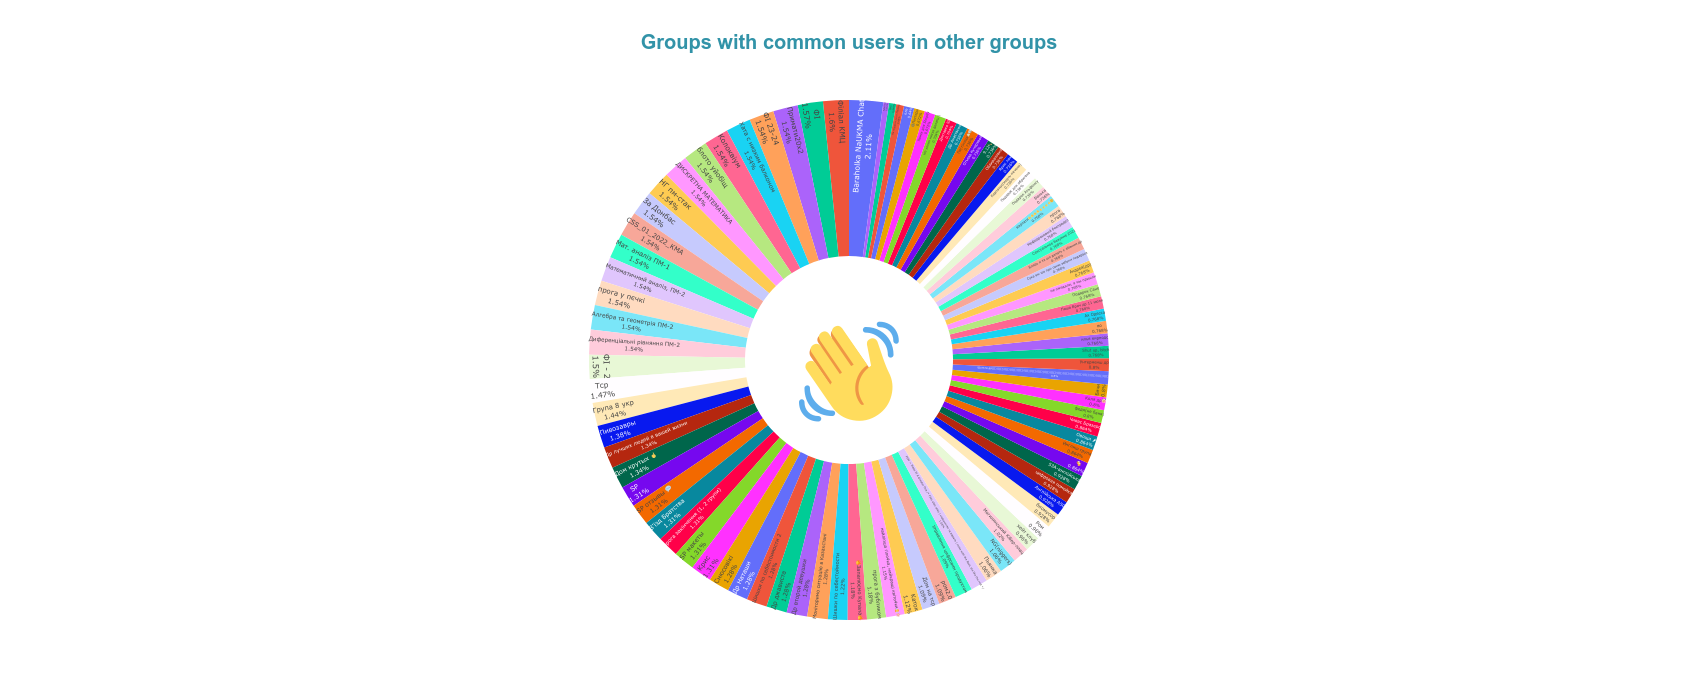

In [91]:
fig = go.Figure(data=[go.Pie(labels=common_groups['name'], values=common_groups['common_users'],hole=.4, name='Words',title='👋')])
fig.update_layout(xaxis={'categoryorder':'total ascending'},width=1200,
    height=700, title=dict(
        text='<b>Groups with common users in other groups</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),showlegend=False)
fig.update_traces(hoverinfo="label+value+percent+name", textfont_size=20,textposition='inside', textinfo='percent+label', title_font=dict(size=100,family='Verdana', 
                                   color='darkred'),)
fig.show()

In [92]:
common_groups_top_5 = common_groups.nlargest(5, 'common_users')
common_groups_lowest_5 = common_groups.nsmallest(5, 'common_users')
common_groups_lowest_5

dialog_id                                              users  \
50  -359287800  [{'user_id': 620481408, 'first_name': 'Артур',...   
72  -465202439  [{'user_id': 318178679, 'first_name': 'Поляков...   
41  -309381285  [{'user_id': 946978511, 'first_name': 'Oymajjj...   
74  -471241654  [{'user_id': 449395499, 'first_name': 'Мария',...   
54  -372347500  [{'user_id': 277741288, 'first_name': 'yyuuuur...   

                       name  \
50                 Работяги   
72                      Опа   
41  На подарок на нг Майклу   
74                      оле   
54        Поиск для Shopify   

                                              user_id  n_users  common_users  
50  {620481408, 447424450, 388838441, 347587664, 3...       10            11  
72                                        {318178679}        1            14  
41       {419909704, 351920301, 312377695, 946978511}        4            15  
74  {315599105, 414015683, 341365060, 431545925, 4...       10            20  
54                                        {384852109}        1            21

In [93]:
common_groups_lowest_5['name'][common_groups_lowest_5['name'].str.contains('FIdo')] = "FIdo"

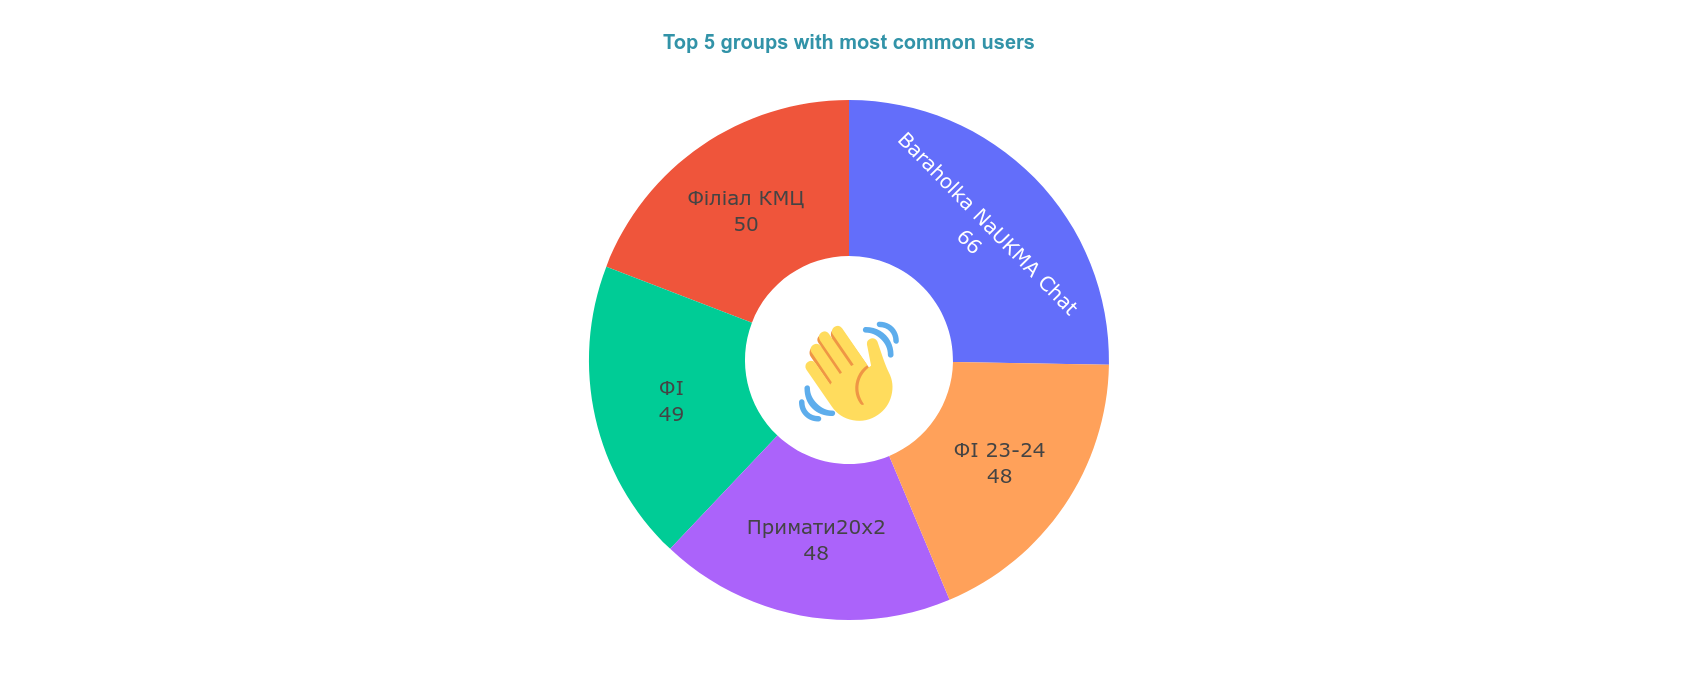

In [94]:
fig = go.Figure(data=[go.Pie(labels=common_groups_top_5['name'], values=common_groups_top_5['common_users'],hole=.4, name='Words',title='👋')])
fig.update_layout(xaxis={'categoryorder':'total ascending'},width=1200,
    height=700, title=dict(
        text='<b>Top 5 groups with most common users</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),showlegend=False)
fig.update_traces(hoverinfo="label+value+percent+name", textfont_size=20,textposition='inside', textinfo='value+label', title_font=dict(size=100,family='Verdana', 
                                   color='darkred'),)
fig.show()

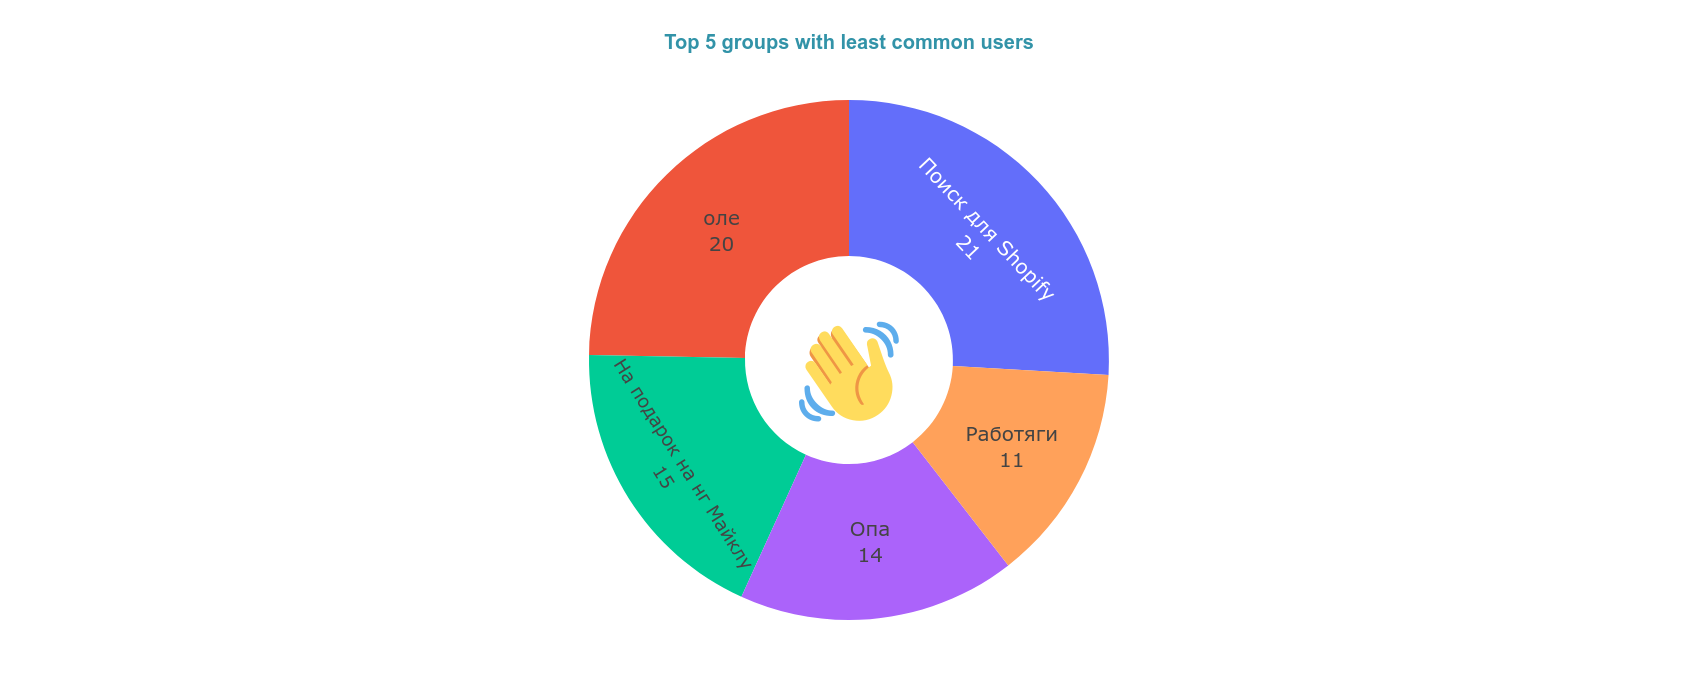

In [95]:
fig = go.Figure(data=[go.Pie(labels=common_groups_lowest_5['name'], values=common_groups_lowest_5['common_users'],hole=.4, name='Words',title='👋')])
fig.update_layout(xaxis={'categoryorder':'total ascending'},width=1200,
    height=700, title=dict(
        text='<b>Top 5 groups with least common users</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#3293a8'
        )
    ),showlegend=False)
fig.update_traces(hoverinfo="label+value+percent+name", textfont_size=20,textposition='inside', textinfo='value+label', title_font=dict(size=100,family='Verdana', 
                                   color='darkred'),)
fig.show()

## DISTRIBUTION OF TEXT MESSAGES IN GROUPS AND PRIVATE MESSAGES BY YEARS

In [96]:
df_full_groups_text_ms = df_full_groups[df_full_groups['type'] == 'text']
df_full_private_text_ms = df_full_private[df_full_private['type'] == 'text']

In [97]:
df_groups_years = df_full_groups_text_ms.groupby(pd.to_datetime(df_full_groups_text_ms.date).dt.year)['message'].count().reset_index()
df_private_years = df_full_private_text_ms.groupby(pd.to_datetime(df_full_private_text_ms.date).dt.year)['message'].count().reset_index()

In [98]:
df_private_years

date  message
0  2017     2039
1  2018     4814
2  2019    71318
3  2020    38689
4  2021    51672
5  2022     9998

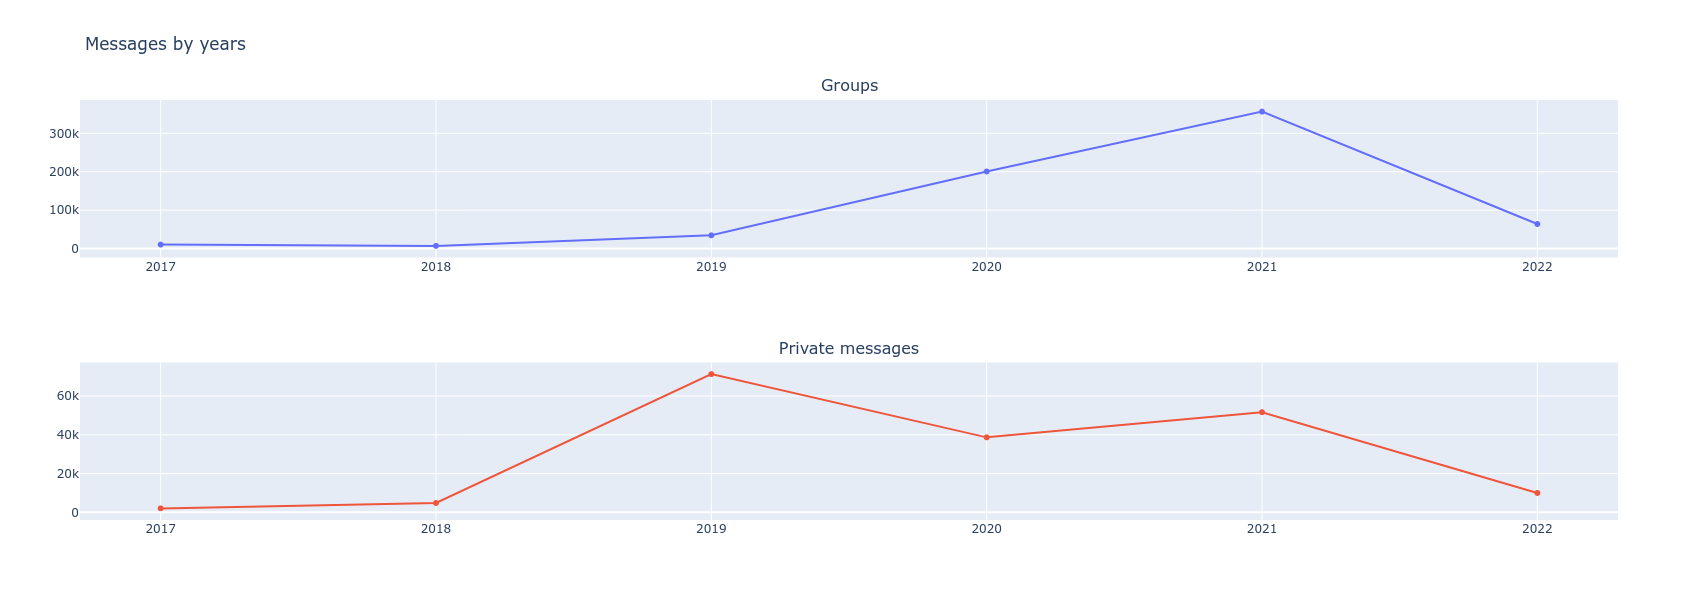

In [99]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Groups", "Private messages",))

fig.add_trace(
    go.Scatter(x=df_groups_years['date'], y=df_groups_years['message']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_private_years['date'], y=df_private_years['message'],),
    row=2, col=1
)

fig.update_layout(height=600, width=1000, title_text="Messages by years", showlegend=False,)
fig.show()

## DISTRIBUTION OF TEXT MESSAGES IN GROUPS AND PRIVATE MESSAGES BY Months

In [100]:
df_groups_months = df_full_groups_text_ms.groupby(pd.to_datetime(df_full_groups_text_ms.date).dt.month)['message'].count().reset_index()
df_private_months = df_full_private_text_ms.groupby(pd.to_datetime(df_full_private_text_ms.date).dt.month)['message'].count().reset_index()

In [101]:
import calendar
df_groups_months['Month'] = df_groups_months['date'].apply(lambda x: calendar.month_abbr[x])
df_private_months['Month'] = df_private_months['date'].apply(lambda x: calendar.month_abbr[x])

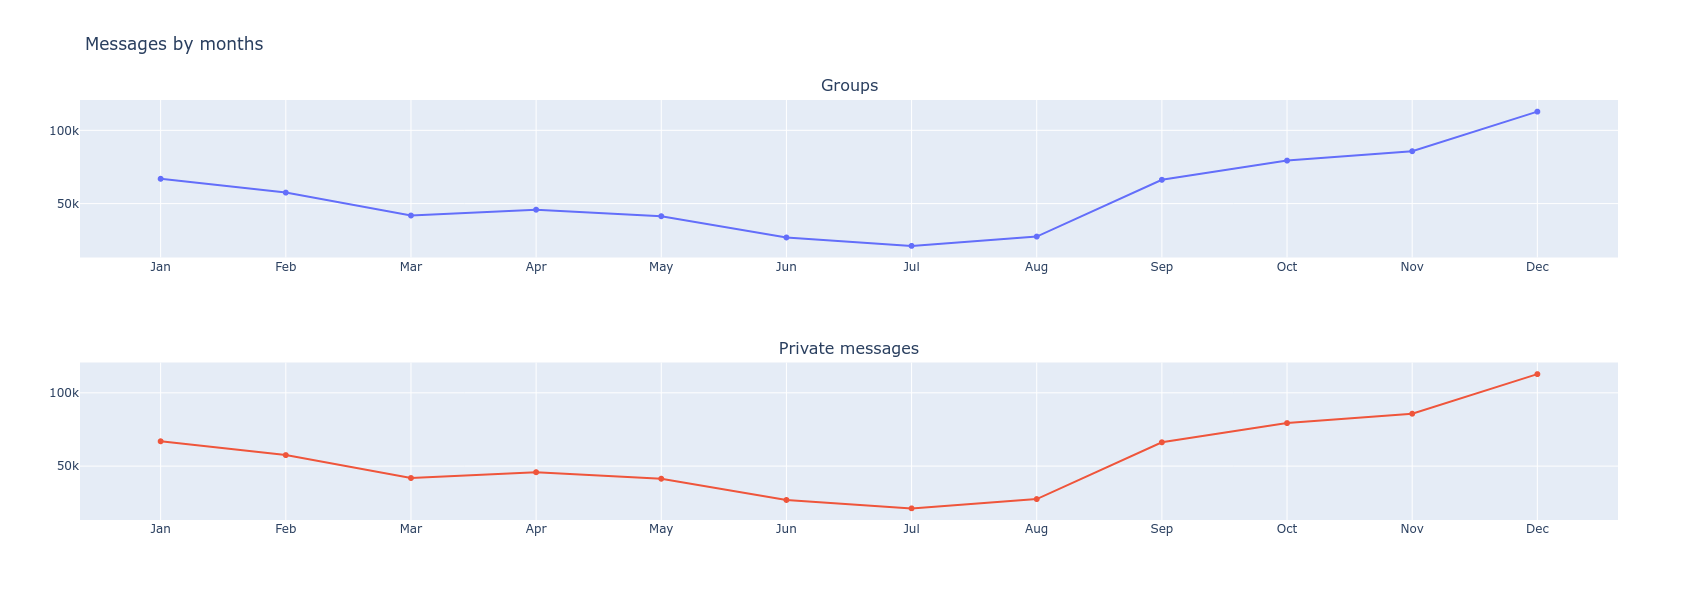

In [102]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Groups", "Private messages",))

fig.add_trace(
    go.Scatter(x=df_groups_months['Month'], y=df_groups_months['message']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_groups_months['Month'], y=df_groups_months['message'],),
    row=2, col=1
)

fig.update_layout(height=600, width=1500, title_text="Messages by months", showlegend=False,)
fig.show()

## DISTRIBUTION OF TEXT MESSAGES IN GROUPS AND PRIVATE MESSAGES BY days

In [103]:
df_groups_days = df_full_groups_text_ms.groupby(pd.to_datetime(df_full_groups_text_ms.date))['message'].count().reset_index()
df_private_days = df_full_private_text_ms.groupby(pd.to_datetime(df_full_private_text_ms.date))['message'].count().reset_index()

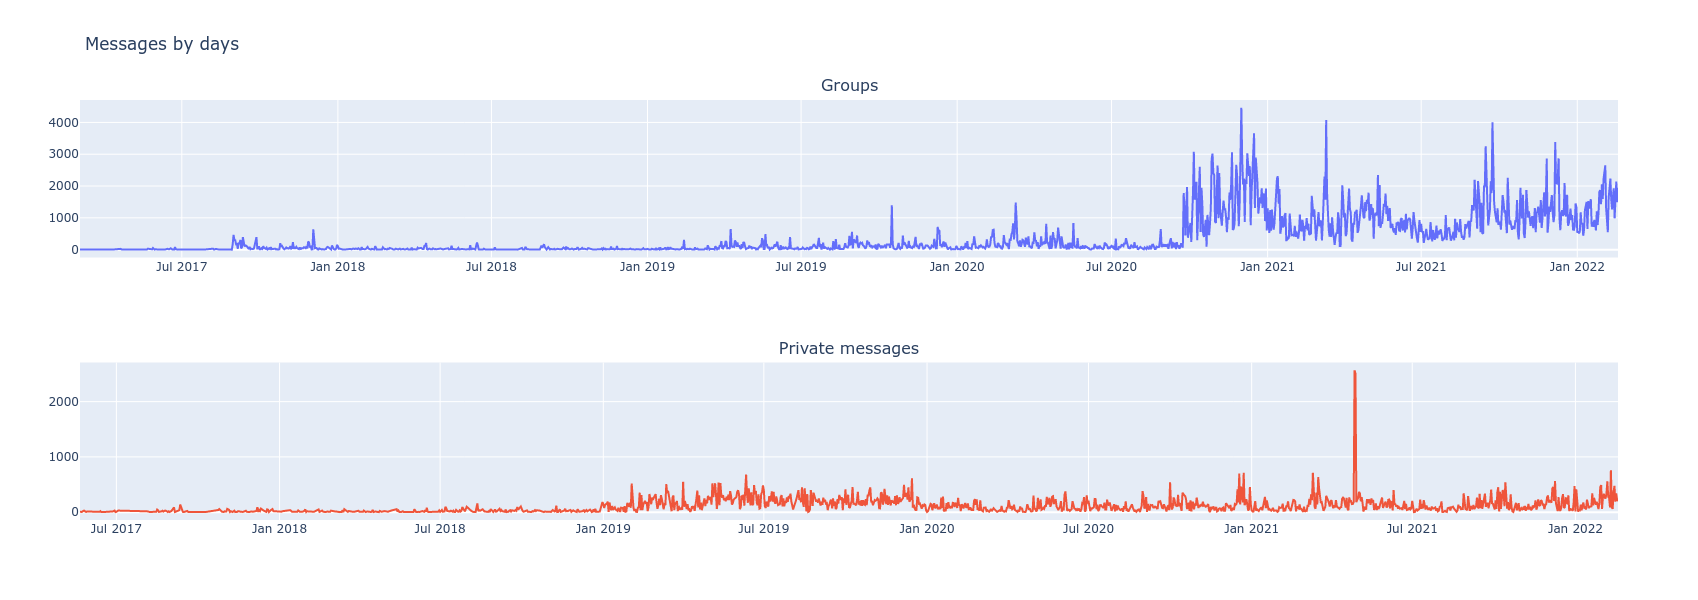

In [104]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Groups", "Private messages",))

fig.add_trace(
    go.Scatter(x=df_groups_days['date'], y=df_groups_days['message']),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_private_days['date'], y=df_private_days['message'],),
    row=2, col=1
)

fig.update_layout(height=600, width=1000, title_text="Messages by days", showlegend=False,)
fig.show()

# Результати гіпотез 

- більше повідомлень пишуть під час навчального року - ***так і є, чати дуже активізуються***
- більше голосових повідомлень записують в п'ятницю - ***в п'ятницю і понеділок, можливо люди розповідають як вони проводять вихідні***
- чим більше юзерів - тим більше повідомлень - ***не завжди, залежить від тематики чату***
- чим більше юзерів - тим більме матів * - ***не завжди, в не локальних чатах люди використовують меньше мата, можливо вони відчувають що їх засудять за таке*** 
- кількість моїх повідомлень збільшилась після вступу в Могилянку - ***так і є***